<a href="https://colab.research.google.com/github/Leonandro/An-analysis-of-the-differences-between-genders-and-ethnic-groups-in-UFRN/blob/master/Trabalho_probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

**Autor:** Leonandro Valério Barbosa Gurgel

**Resumo:** O estudo abaixo tem por objetivo analisar as diferenças entre gêneros e etnias nos cursos de graduação e pós graduação da UFRN. Sendo estruturado pelo estudos das pós graduações: PPgEEC, PPgSC, PPgSW, PPgITE e PPgBIOINF. Pelo estudo também dos cursos de graduação de natal e dos cursos de graduação fora de natal ou multicampi.

**Dados:** Foram utilizados dados do site de dados abertos da UFRN: http://dados.ufrn.br   sendo utilizados os dados dos ingressantes de 2009 a 2019.

# Leitura inicial de dados

In [0]:
#Leitura de dados inicial 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d09 = pd.read_csv("discentes-2009.csv",sep=";").drop(8129) # Linha com dado corrompido
d10 = pd.read_csv("discentes-2010.csv",sep=";")
d11 = pd.read_csv("discentes-2011.csv",sep=";")
d12 = pd.read_csv("discentes-2012.csv",sep=";")
d13 = pd.read_csv("discentes-2013.csv",sep=";")
d14 = pd.read_csv("discentes-2014.csv",sep=";")
d15 = pd.read_csv("discentes-2015.csv",sep=";")
d16 = pd.read_csv("discentes-2016.csv",sep=";")
d17 = pd.read_csv("discentes-2017.csv",sep=";")
d18 = pd.read_csv("discentes-2018.csv",sep=";")
d19 = pd.read_csv("discentes-2019.csv",sep=";")

discentes = pd.concat([d09, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19], ignore_index=True)



# Estratificação de dados

## UFRN 

> Selecionando somente os alunos dos cursos de graduação da ufrn que ingressaram de 2009 a 2019



In [0]:
discentes_grad = discentes[discentes.nivel_ensino == "GRADUAÇÃO"]

> Selecionando somente os alunos de pós graduações desses centros: PPgEEC, PPgSC, PPgSW, PPgITE e PPgBIOINF.

In [0]:
ppgeec = discentes[discentes.nome_unidade == "PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO"]
ppgsc = discentes[discentes.nome_unidade == "PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMAS E COMPUTAÇÃO"]
ppgsw = discentes[discentes.nome_unidade == "PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SOFTWARE"]
ppgite = discentes[discentes.nome_unidade == "PROGRAMA DE PÓS-GRADUAÇÃO EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS"]
ppgbioinf = discentes[discentes.nome_unidade == "PROGRAMA DE PÓS-GRADUAÇÃO EM BIOINFORMÁTICA"]



> Concatenando todas as pós graduações de interesse em um único dataset.

In [0]:
ufrn_pos = pd.concat([ppgeec, ppgsc, ppgsw, ppgite, ppgbioinf], ignore_index = True)

## UFRN - Natal

>  Categorizando os estudantes por centros de ensino superior da UFRN no campus de Natal/RN

### Centro de Ciêncas Exatas e da Terra

> O CCET é um dos centros de ensino superior da UFRN focado nas ciências exatas, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CCET.

In [0]:
ccet =  discentes_grad[discentes_grad.nome_unidade == "CENTRO DE CIÊNCIAS EXATAS E DA TERRA"]
# 5 Cursos com mais alunos nessa unidade:
#QUÍMICA                   2415
#MATEMÁTICA                2257
#FÍSICA                    1675
#ESTATÍSTICA                568
#QUÍMICA DO PETRÓLEO        517

### Centro de Ciências Humanas, Letras e Artes

> O CCHLA é um dos centros de ensino superior da UFRN focado nas ciências humanas, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CCHLA.

In [0]:
cchla = discentes_grad[discentes_grad.nome_unidade == "CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"]
# 5 Cursos com mais alunos nessa unidade>
#GEOGRAFIA                                       2265
#HISTÓRIA                                        1959
#COMUNICAÇÃO SOCIAL                              1643
#LETRAS                                          1486
#GESTÃO DE POLÍTICAS PÚBLICAS                    1357

### Centro de Ciências Sociais Aplicadas

> O CCSA é um dos centros de ensino superior da UFRN focado nas ciências sociais, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CCSA.

In [0]:
ccsa = discentes_grad[discentes_grad.nome_unidade == "CENTRO DE CIÊNCIAS SOCIAIS APLICADAS"]
# 5 Cursos com mais alunos nessa unidade>
#DIREITO                   2413
#ADMINISTRAÇÃO             2358
#CIÊNCIAS CONTÁBEIS        2064
#ADMINISTRAÇÃO PÚBLICA     1223
#CIÊNCIAS ECONÔMICAS       1150


### Centro de Ciências da Saúde

> O CCS é um dos centros de ensino superior da UFRN focado nas ciências voltadas a saúde, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CCS.

In [0]:
ccs = discentes_grad[discentes_grad.nome_unidade == "CENTRO DE CIÊNCIAS DA SAÚDE"]
# 5 Cursos com mais alunos nessa unidade>
#FARMÁCIA           2135
#EDUCAÇÃO FÍSICA    1914
#ENFERMAGEM         1419
#MEDICINA           1189
#ODONTOLOGIA         978

### Centro de Tecnologia

>O CT é um centro de ensino superior da UFRN focado nas egenharias, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CT.

In [0]:
ct = discentes_grad[discentes_grad.nome_unidade == "CENTRO DE TECNOLOGIA"]
# 5 Cursos com mais alunos nessa unidade:
#ENGENHARIA CIVIL                  1268
#ENGENHARIA ELÉTRICA               1099
#ENGENHARIA DE PRODUÇÃO            1053
#ENGENHARIA QUÍMICA                 854
#ENGENHARIA MECÂNICA                783

### Centro de Biociências

>O CB é um centro de ensino superior da UFRN focado nas ciências biologógicas, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CB.

In [0]:
cb = discentes_grad[discentes_grad.nome_unidade == "CENTRO DE BIOCIÊNCIAS"]
# 5 Cursos com mais alunos nessa unidade:
#CIÊNCIAS BIOLÓGICAS          3197
#ECOLOGIA                      855
#BIOMEDICINA                   829
#ENGENHARIA DE AQUICULTURA     423
#AQUICULTURA                    85

### Instituto Metrópole Digital

> O IMD é um centro de ensino superior da UFRN voltado a área tecnológica, mas precisamente, Tecnologia da Informação. Possuí somente esse curso, nesse dataset, reuno todos os ingressantes de 2013 a 2019 que entraram no curso de TI da UFRN.

In [0]:
imd = discentes_grad[discentes_grad.nome_unidade == "INSTITUTO METROPOLE DIGITAL"]
# Curso com mais alunos nessa unidade:
#TECNOLOGIA DA INFORMAÇÃO    2226

### Escola de Ciências e Tecnologia

> A ECT é um centro de ensino superior da UFRN voltado a área tecnológica, visando uma formação base para posteriormente entrar em uma engenharia mais avançada. Possuí somente o curso de Ciências e Tecnologia, nesse dataset, reuno todos os ingressantes de 2009 a 2019 que entraram no curso de C&T da UFRN.

In [0]:
ect = discentes_grad[discentes_grad.nome_unidade == "ESCOLA DE CIÊNCIAS E TECNOLOGIA"]
# Curso com mais alunos nessa unidade>
#CIÊNCIAS E TECNOLOGIA    12642


### Escola da Saúde

> A ESUFRN é um dos centros de ensino superior da UFRN focado nas ciências da saúde, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao ESUFRN.

In [0]:
es = discentes_grad[discentes_grad.nome_unidade == "ESCOLA DE SAÚDE"]
# Curso com mais alunos nessa unidade:
#GESTÃO HOSPITALAR    772

### Centro de Educação


> O CE é um dos centros de ensino superior da UFRN focado nos metódos de ensino e aprendizagem, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CE

In [0]:
ce = discentes_grad[discentes_grad.nome_unidade == "CENTRO DE EDUCAÇÃO"]
# Curso com mais alunos nessa unidade:
#PEDAGOGIA    3297

### Escola de Música

> A EMUFRN é um dos centros de ensino superior da UFRN focado nos metódos de ensino e aperfeiçoamento da música, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao EMUFRN.

In [0]:
em = discentes_grad[discentes_grad.nome_unidade == "ESCOLA DE MÚSICA"]
# Curso com mais alunos nessa unidade:
#MÚSICA    783

### Todos os centros de Natal (Graduação)

In [0]:
ufrn_natal_grad = pd.concat([ccet, ccsa, ccs, cchla, ect, ct, imd, em, ce, cb, es], ignore_index = True)

## UFRN - Multicampi/Interior

>Categorizando os estudantes por centros de ensino superior da UFRN no Fora de Natal/RN ou multicampi.

### Escola Multicampi de Ciências Médicas do Rio Grande do Norte

> A EMCM é um dos centros de ensino superior da UFRN focado nas ciências da saúde, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao EMCM.

In [0]:
emcm = discentes_grad[discentes_grad.nome_unidade == "ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE"]
# Curso com mais alunos nessa unidade:
#MEDICINA    252

### Escola Agrícola de Jundiaí

>A EAJ é um dos centros de ensino superior da UFRN, localizado na cidade de Jundiaí/RN, focado nas ciências 
agrícolas, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao EAJ.





In [0]:
eaj = discentes_grad[discentes_grad.nome_unidade == "ESCOLA AGRÍCOLA DE JUNDIAÍ"]
# 4 Cursos com mais alunos nessa unidade:
#ZOOTECNIA                                579
#ENGENHARIA FLORESTAL                     428
#ENGENHARIA AGRONÔMICA                    374
#ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    226


### Faculdade de Ciências da Saúde do Trairí

> A FACISA é um dos centros de ensino superior da UFRN, localizado na cidade de Santa Cruz/RN, focado nas ciências da saúde, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao FACISA.

In [0]:
facisa = discentes_grad[discentes_grad.nome_unidade == "FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA"]
# 4 Cursos com mais alunos nessa unidade:
#ENFERMAGEM      474
#FISIOTERAPIA    457
#NUTRIÇÃO        441
#PSICOLOGIA      239

### Centro de Ensino Superior do Seridó

> O CERES é um dos centros de ensino superior da UFRN, localizado na cidade de Santa Cruz/RN,  de múltiplas vertentes científicas, nesse dataset sobre esse núcleo, reuni todos os ingressantes de 2009 a 2019 de todos os cursos que pertençam ao CERES.

In [0]:
cess = discentes_grad[discentes_grad.nome_unidade == "CENTRO DE  ENSINO SUPERIOR DO SERIDÓ"]
# 5 Cursos com mais alunos nessa unidade:
#GEOGRAFIA                      1058
#HISTÓRIA                       1002
#DIREITO                         648
#CIÊNCIAS CONTÁBEIS              607
#ADMINISTRAÇÃO                   572

### Todos os centros fora de Natal ou multicampi

In [0]:
ufrn_interior = pd.concat([cess, eaj, facisa, emcm], ignore_index = True)

# Análise de dados e conclusões

##UFRN - Pós Graduações  

### Análise sobre cada pós graduação

#### PPgEEC

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgEEC da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos

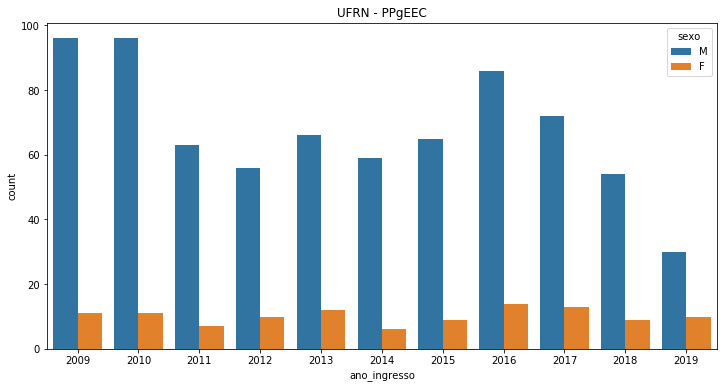

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ppgeec)
plt.title("UFRN - PPgEEC")
plt.show()

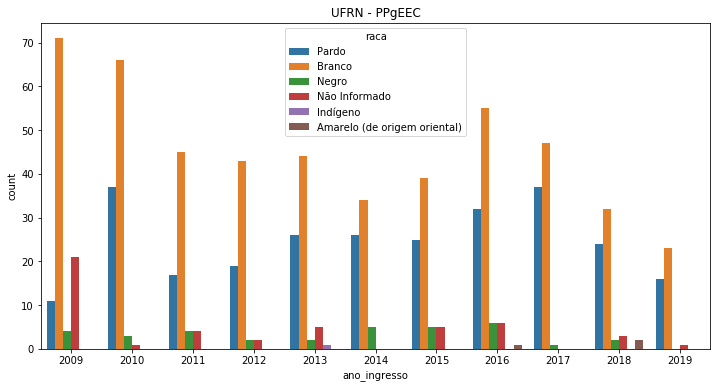

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ppgeec)
plt.title("UFRN - PPgEEC")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgEEC da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

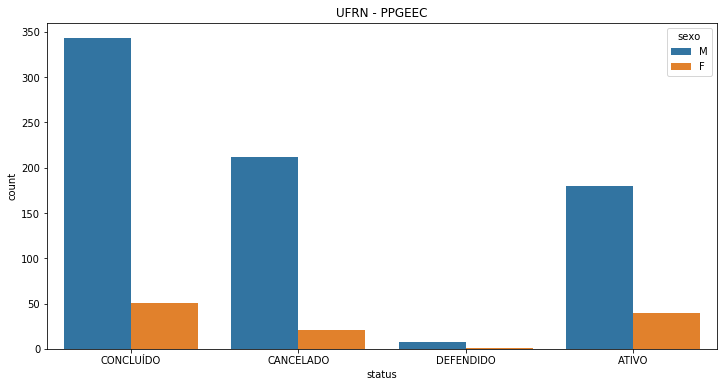

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ppgeec)
plt.title("UFRN - PPGEEC")
plt.show()

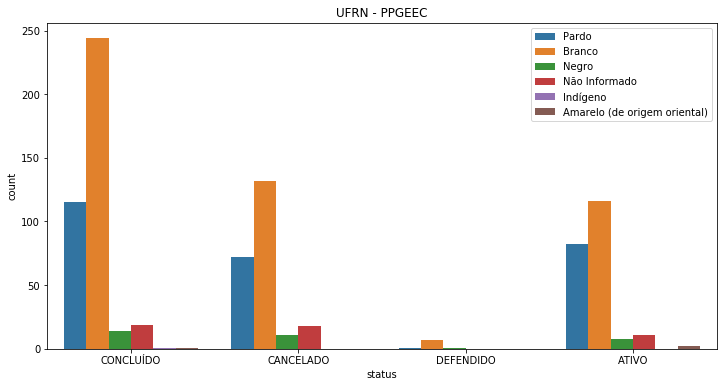

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ppgeec)
plt.title("UFRN - PPGEEC")
plt.legend(loc = 1)
plt.show()

**Conclusão (Gêneros)** Existe um grande diferença no número de ingressantes sendo que a ingressam muitos mais homens que mulheres e isso se reflete diretamente no número de concluintes de cada gênero.

**Conclusão (Etnias)** Novamente existe uma grande discrepância com forte ingresso de pessoas brancas e pardas e um baixo ingresso de pessoas negras, amarelas e indigenos. Como esperado, isso se reflete diretamente no número de concluintes.

#### PPgSC

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgSC da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos

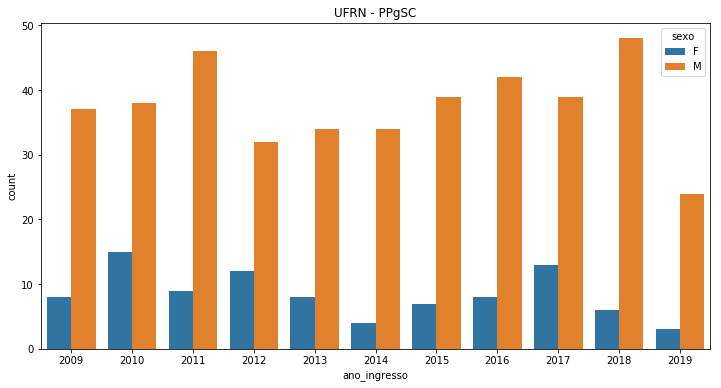

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ppgsc)
plt.title("UFRN - PPgSC")
plt.show()

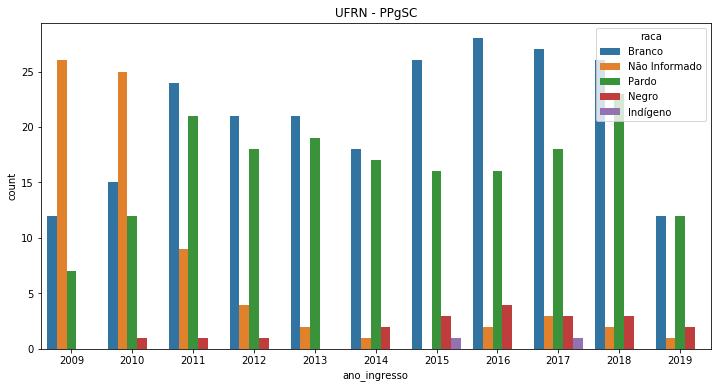

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ppgsc)
plt.title("UFRN - PPgSC")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgSC da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

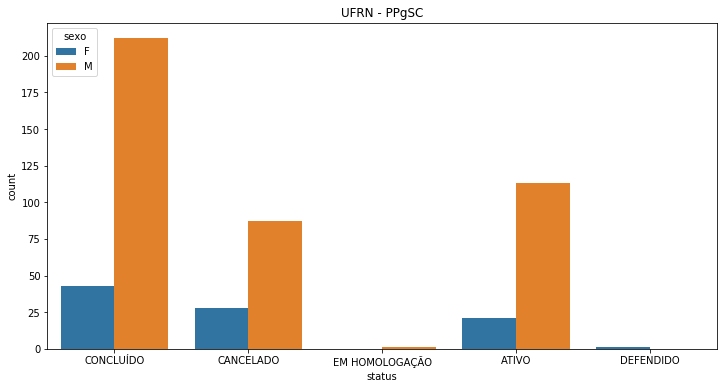

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ppgsc)
plt.title("UFRN - PPgSC")
plt.show()

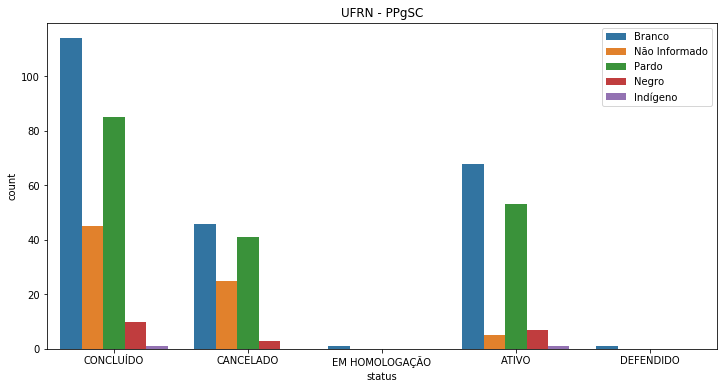

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ppgsc)
plt.title("UFRN - PPgSC")
plt.legend(loc=1)
plt.show()

>**Conclusão (Gêneros)** Existe um grande diferença no número de ingressantes sendo que a ingressam muitos mais homens que mulheres e isso se reflete diretamente no número de concluintes de cada gênero.

>**Conclusão (Etnias)** Novamente existe uma grande discrepância com forte ingresso de pessoas brancas e pardas e um baixo ingresso, ou até mesmo nulo, de pessoas negras, amarelas e indigenos. Como esperado, isso se reflete diretamente no número de concluintes.

>**OBS:** Nos dois primeiros anos houve um número maior de pessoas que não informaram a etnia. Logo não consigo analisar especificamente esses dados.

#### PPgSW

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgSW da UFRN no campus de Natal, entre 2014 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos

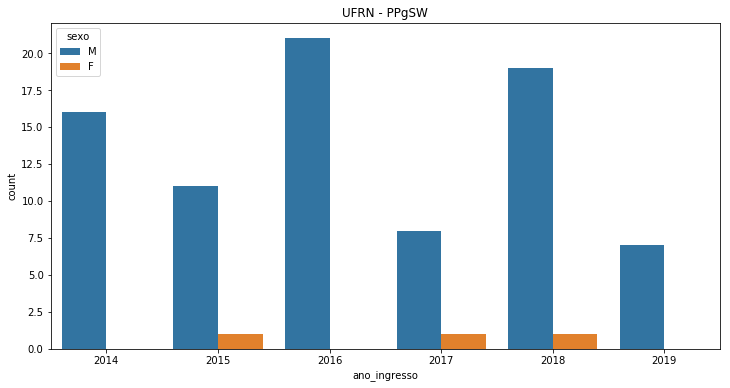

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ppgsw)
plt.title("UFRN - PPgSW")
plt.show()

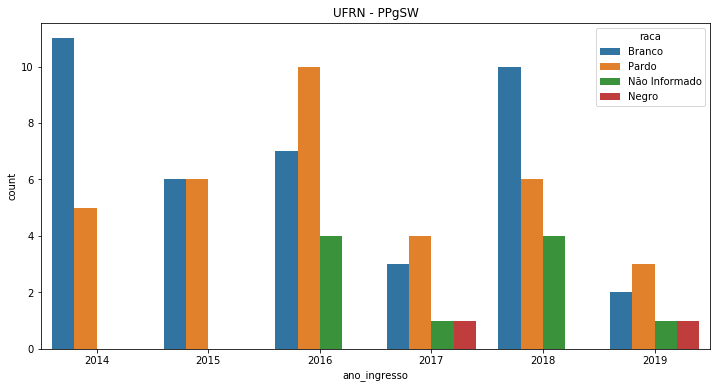

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ppgsw)
plt.title("UFRN - PPgSW")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgSW da UFRN no campus de Natal, entre 2014 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset No que se refere ao ingresso e status atuais desses alunos.

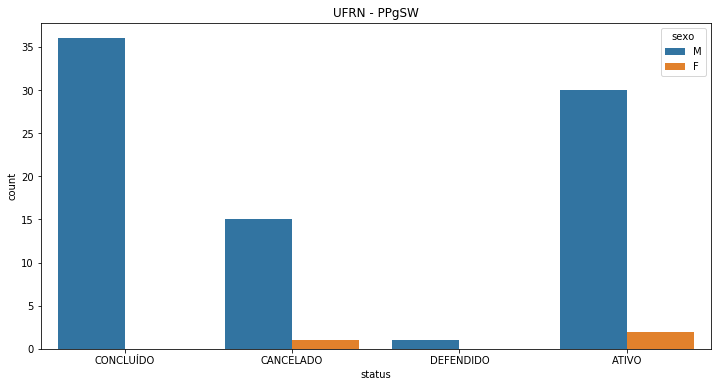

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ppgsw)
plt.title("UFRN - PPgSW")
plt.show()

>**Conclusão (Gêneros)** Existe um grande diferença no número de ingressantes sendo que a ingressam muitos mais homens que mulheres e isso se reflete diretamente no número de concluintes de cada gênero

> **Conclusão (Etnias)** Novamente existe uma grande discrepância com forte ingresso de pessoas brancas e pardas e um baixo ingresso, ou até mesmo nulo, de pessoas negras, amarelas e indigenos. Como esperado, isso se reflete diretamente no número de concluintes.

> **NOTAS IMPORTANTES** A discrepância no PPgSW é  no ingresso de Homens e Mulheres, que até o ano de 2019 nenhum mulher tinha concluído o curso.

#### PPgITE

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgITE da UFRN no campus de Natal, entre 2017 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino,  também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos

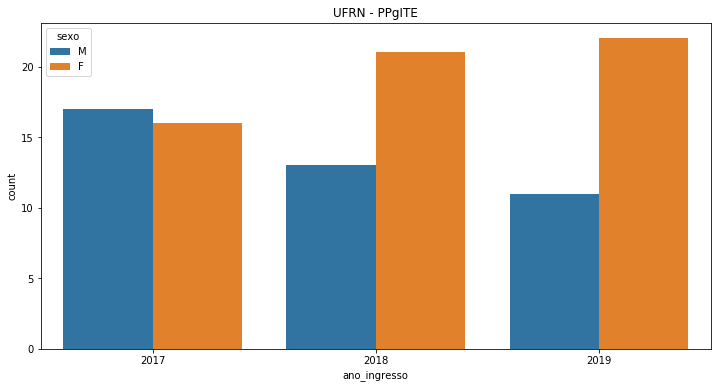

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ppgite)
plt.title("UFRN - PPgITE")
plt.show()

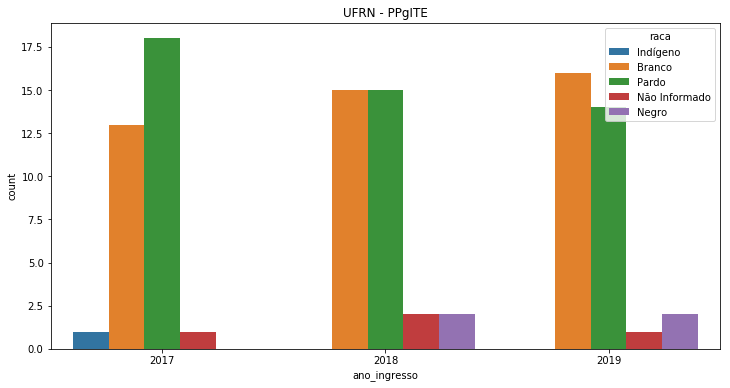

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ppgite)
plt.title("UFRN - PPgITE")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgITE da UFRN no campus de Natal, entre 2017 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino,  também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

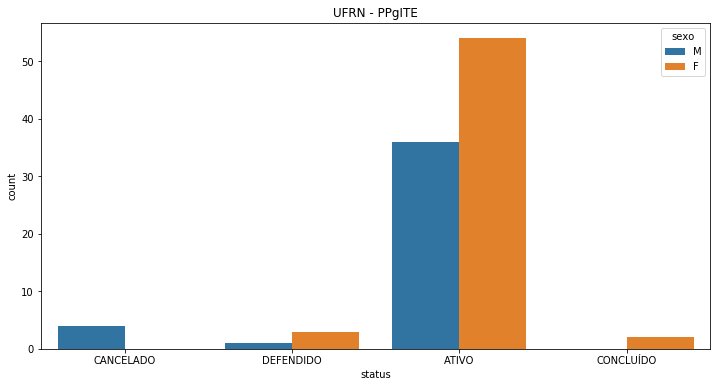

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ppgite)
plt.title("UFRN - PPgITE")
plt.show()

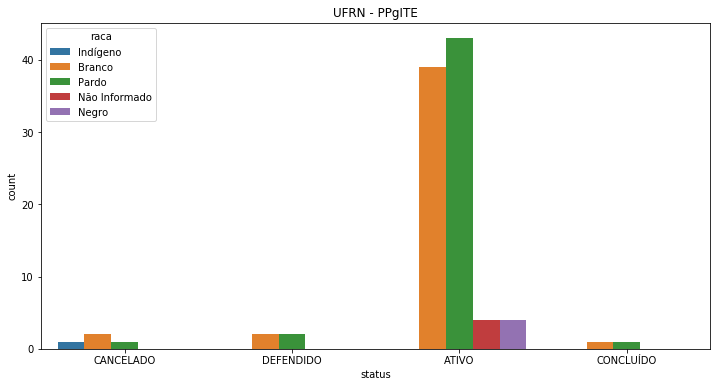

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ppgite)
plt.title("UFRN - PPgITE")
plt.show()

> **Conclusão (Gêneros)** Existe um pequena diferença no número de ingressantes sendo que  ingressam mais mulheres que homens, porém é bem mais equilibrada que a diferença das outras pós graduações, isso se reflete diretamente no número de concluintes de cada gênero

> **Conclusão (Etnias)** Novamente existe uma grande discrepância com forte ingresso de pessoas brancas e pardas e um baixo ingresso, ou até mesmo nulo, de pessoas negras, amarelas e indigenos. Como esperado, isso se reflete diretamente no número de concluintes

> **NOTAS IMPORTANTES** Até o ano de 2019 nenhum homem concluiu o curso.

#### PPgBIOINF

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgBIOINF da UFRN no campus de Natal, entre 2016 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino,  também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos

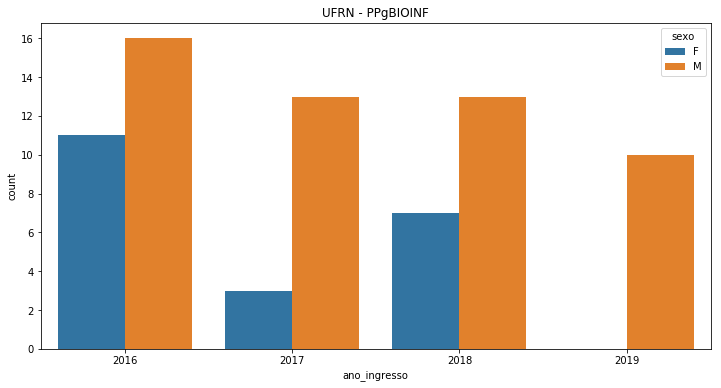

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ppgbioinf)
plt.title("UFRN - PPgBIOINF")
plt.show()

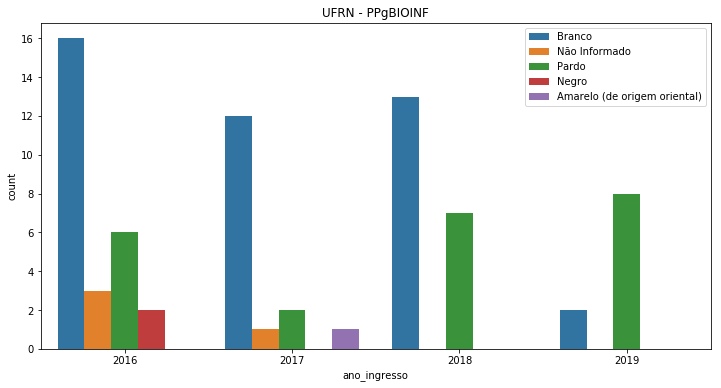

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ppgbioinf)
plt.title("UFRN - PPgBIOINF")
plt.legend(loc=1)
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes da pós graduação PPgBIOINF da UFRN no campus de Natal, entre 2016 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino,  também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

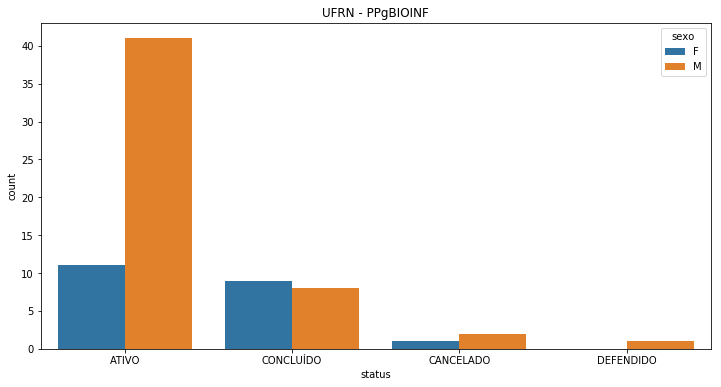

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ppgbioinf)
plt.title("UFRN - PPgBIOINF")
plt.show()

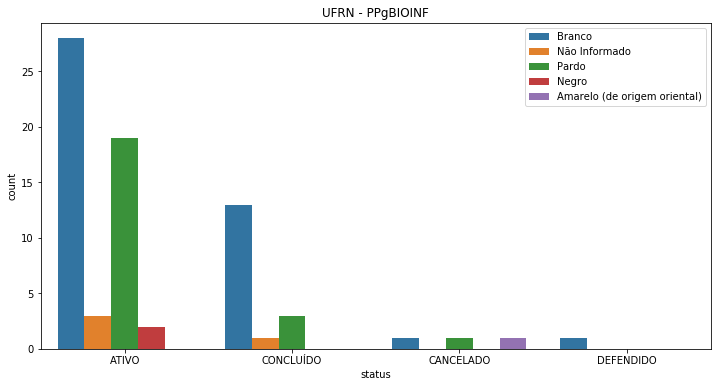

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ppgbioinf)
plt.title("UFRN - PPgBIOINF")
plt.legend(loc=1)
plt.show()

> **Conclusão (Gêneros)** Existe uma pequena diferença no número de ingressantes sendo que ingressam mais homens que  mulheres, isso se reflete diretamente no número de concluintes de cada gênero

> **Conclusão (Etnias)** Novamente existe uma grande discrepância com forte ingresso de pessoas brancas e pardas e um baixo ingresso, ou até mesmo nulo, de pessoas negras, amarelas e indigenos. Como esperado, isso se reflete diretamente no número de concluintes

### Análise sobre todas as pós graduações

>No gráfico a seguir, analisaremos os dados de ingressantes das pós graduações: PPgEEC, PPgSC, PPgSW, PPgITE e PPgBIOINF, da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao  ingresso desses alunos durante os anos.



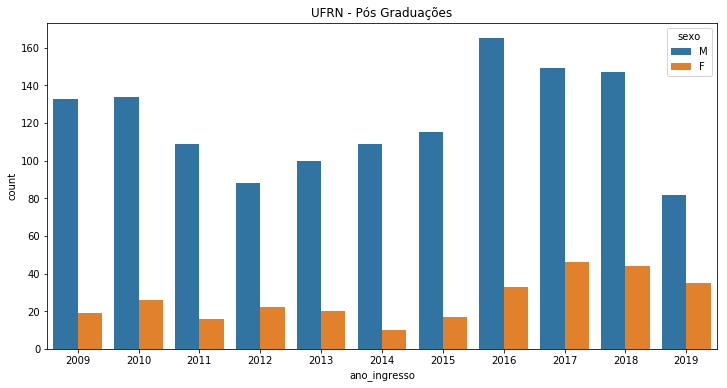

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ufrn_pos)
plt.title("UFRN - Pós Graduações")
plt.show()

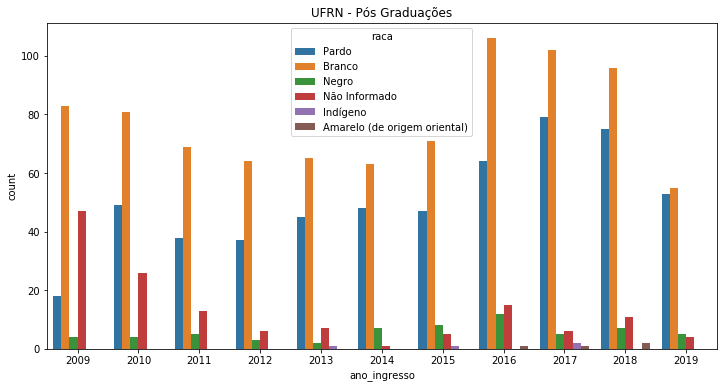

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ufrn_pos)
plt.title("UFRN - Pós Graduações")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes das pós graduações: PPgEEC, PPgSC, PPgSW, PPgITE e PPgBIOINF, da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino. No que se refere ao ingresso e status atuais desses alunos.

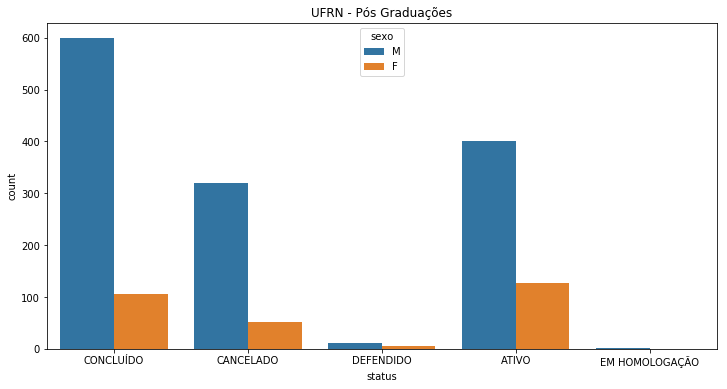

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ufrn_pos)
plt.title("UFRN - Pós Graduações")
plt.show()

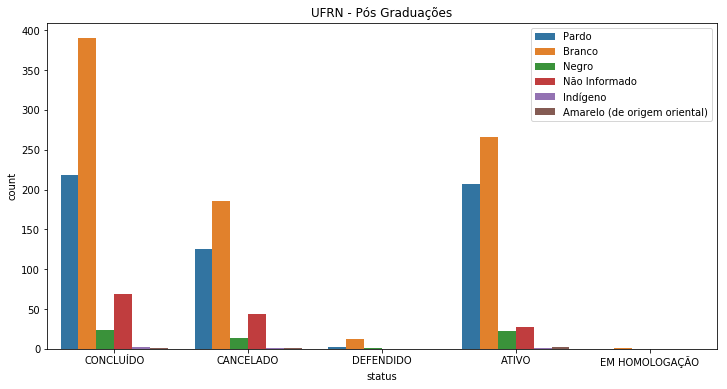

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ufrn_pos)
plt.title("UFRN - Pós Graduações")
plt.legend(loc = 1)
plt.show()

> **Conclusão (Gêneros)** Analisando as 5 pós graduações como um todo, vemos que existe uma grande discrepância entre os gêneros, sendo que tem-se uma entrada majoritariamente masculina. Como consequência disso, temos números relativamente proporcionais de concluintes entre os gêneros dada a diferença de entrada.


>**Conclusão (Etnias)** Analisando as 5 pós graduações como um todo,  vemos que também existem grandes discrepâncias, os brancos e pardos dominam amplamente os cursos de pós graduações enquanto os negros e amarelos, tem um número de ingressantes muito baixo. Quanto a análise geral dos dados, Existe uma entrada sempre maior de pessoas brancas, seguidos a uma distância considerável pelos pardos equanto outras etnias tem um número muito baixo de ingressantes em todos os anos, e isso se reflete quase proporcionalmente nos números de concluintes.

### Comparativo entre os Cursos de pós graduação e os dados gerais de ingressantes

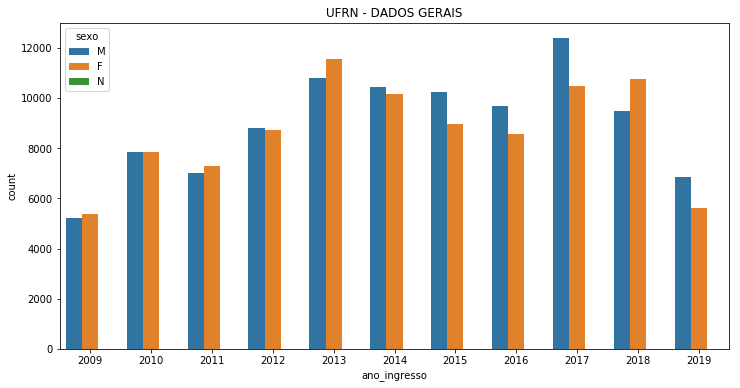

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.show()

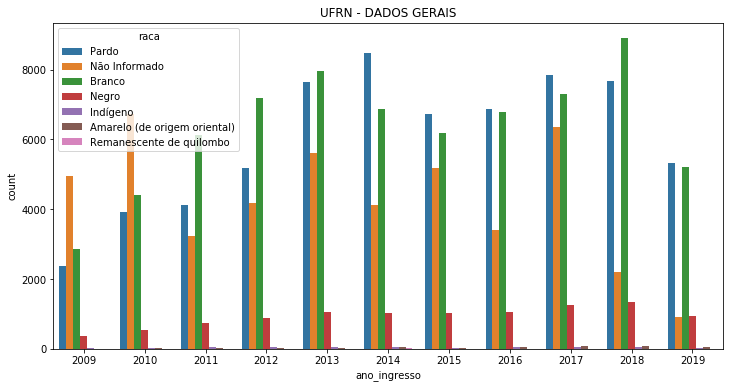

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.show()

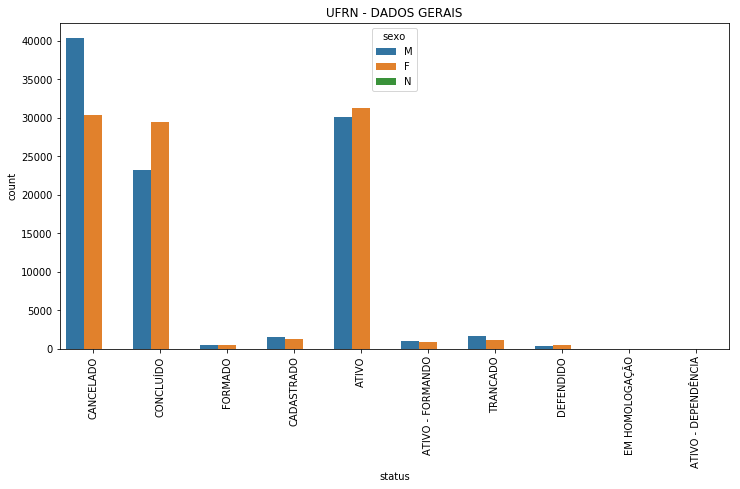

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.xticks(rotation = 90)
plt.show()

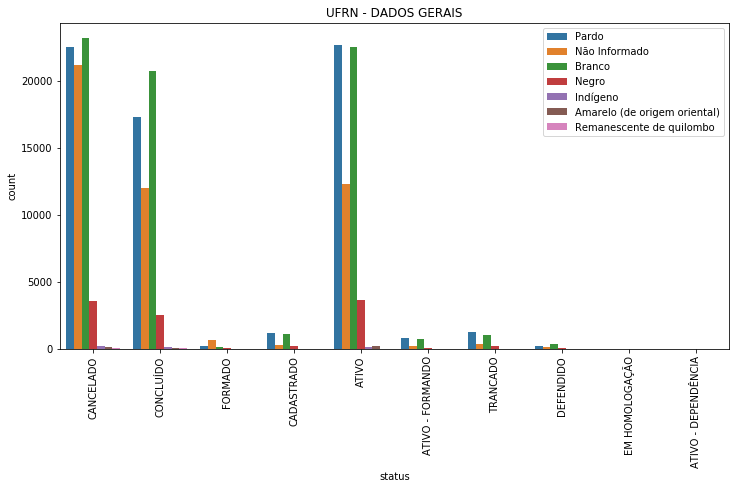

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.legend(loc = 1)
plt.xticks(rotation = 90)
plt.show()

> **Conclusão (Gêneros)**
Comparando os dados das pós graduações, podemos ver que existe uma grande discrepância se comparado com os dados gerais, mas isso se deve a vertente ciêntífica das pós-graduações analisadas, elas são das áreas Exatas / Tecnologias, e assim como nas graduações, existe um ingresso muito maior de homens que de mulheres, enquanto nos dados gerais existe um certo equilibrio.

> **Conclusão (Etnias)**
Quanto as diferenças étnicas, vemos que os dados gerais não diferem muito dos dados das pós graduações. Tendo muito mais brancos e pardos e poucos negros, indigenas, amarelos e remanecentes de quilombo.

## UFRN - Graduações

### UFRN - Natal

#### Centro de Ciências Exatas e da Terra

>No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCET no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

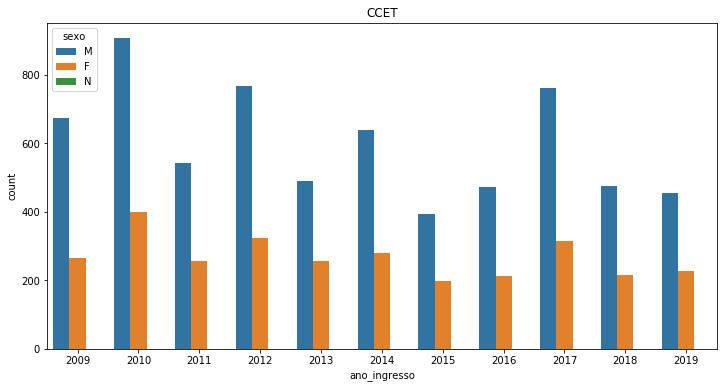

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ccet)
plt.title("CCET")
plt.show()

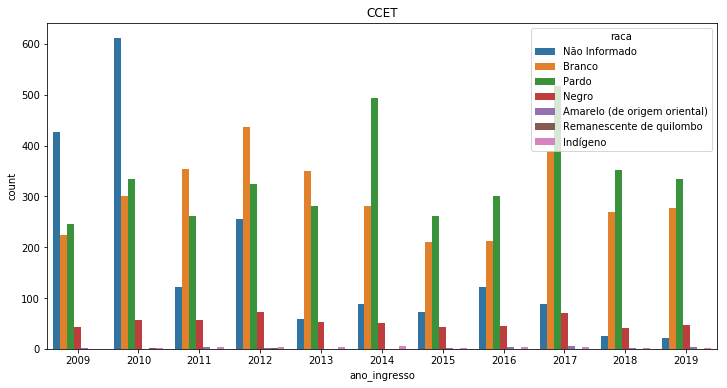

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ccet)
plt.title("CCET")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCET no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

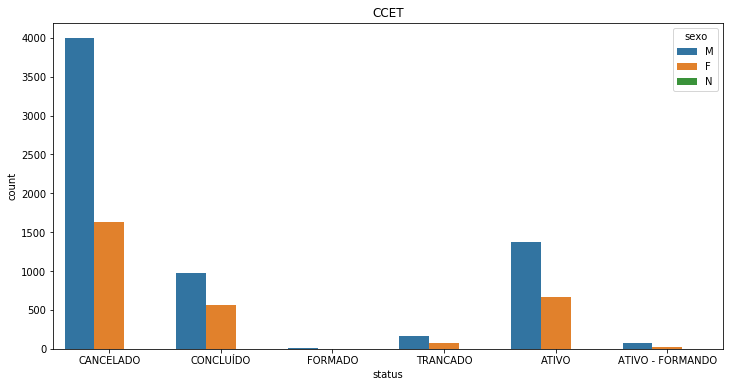

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ccet)
plt.title("CCET")
plt.show()

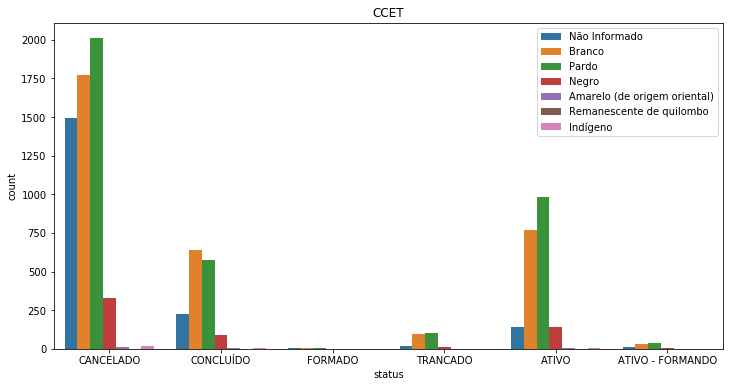

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ccet)
plt.title("CCET")
plt.legend(loc = 1)
plt.show()

#### Centro de Ciências Humanas, Letras e Artes

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCHLA no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

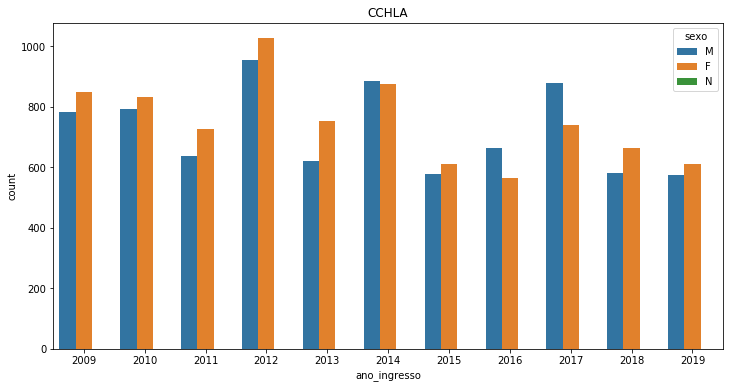

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = cchla)
plt.title("CCHLA")
plt.show()

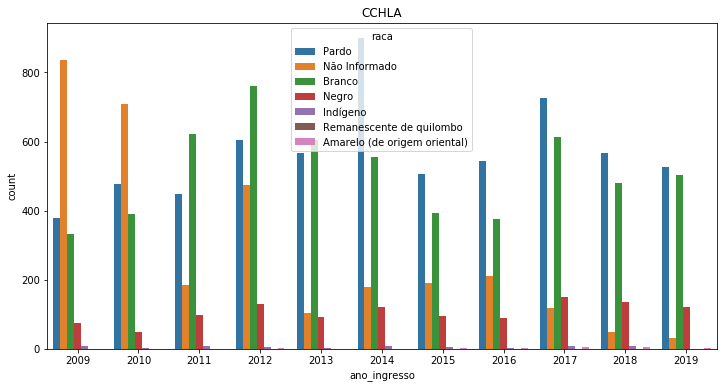

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = cchla)
plt.title("CCHLA")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCHLA no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informado, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

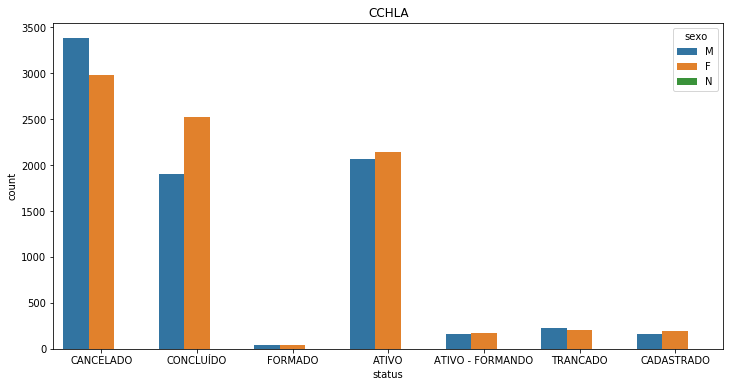

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = cchla)
plt.title("CCHLA")
plt.show()

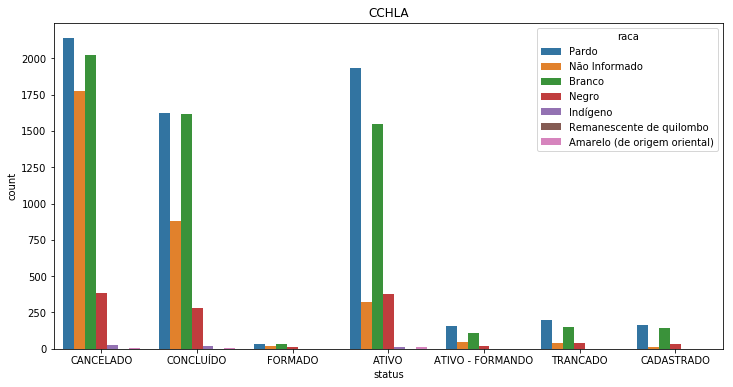

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = cchla)
plt.title("CCHLA")
plt.show()

#### Centro de Ciências Sociais Aplicadas

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCSA no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

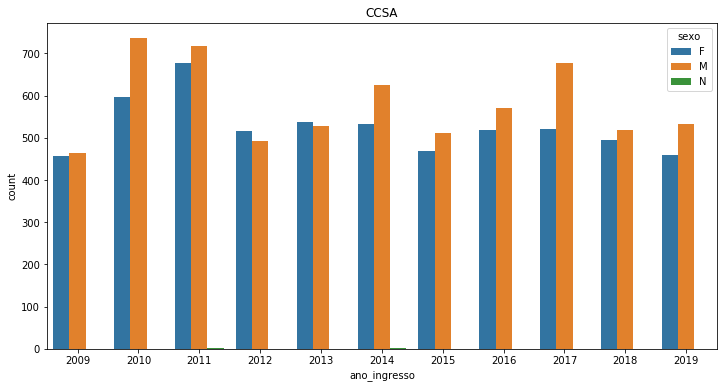

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ccsa)
plt.title("CCSA")
plt.show()

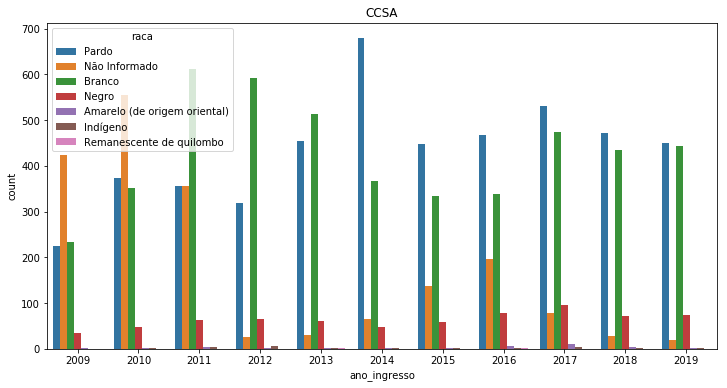

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ccsa)
plt.title("CCSA")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCSA no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informado, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

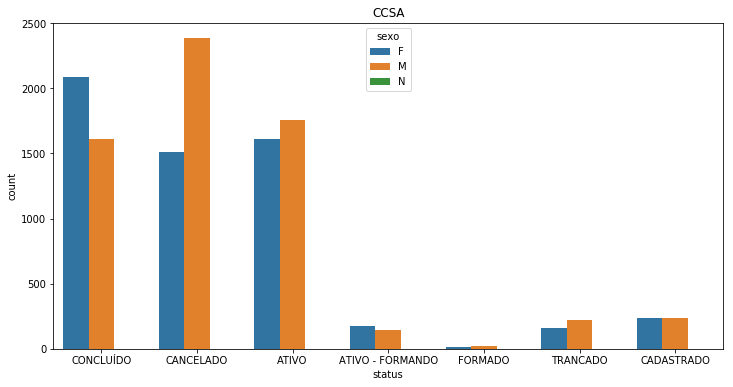

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ccsa)
plt.title("CCSA")
plt.show()

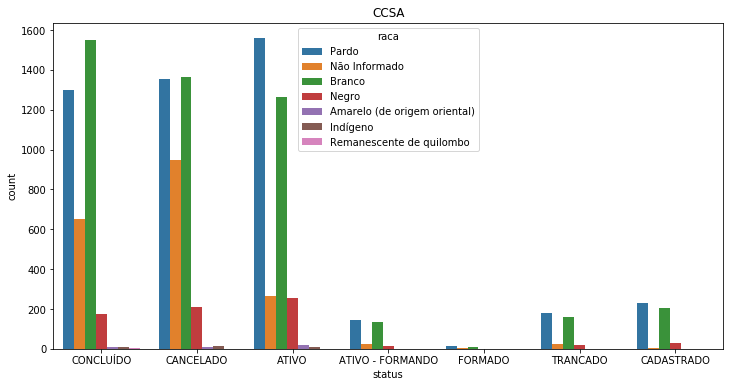

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ccsa)
plt.title("CCSA")
plt.show()

#### Centro de Ciências da Saúde

>  No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCS no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

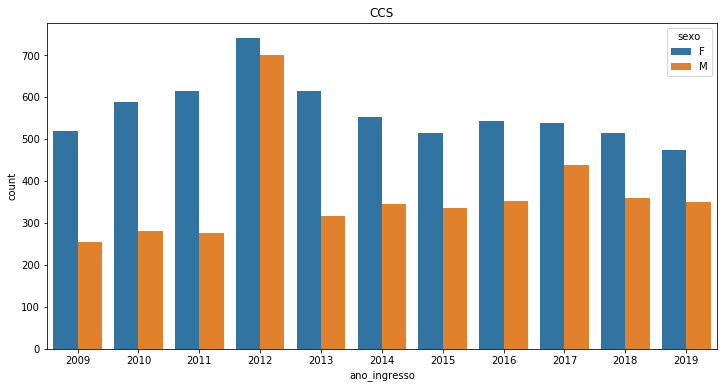

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ccs)
plt.title("CCS")
plt.show()

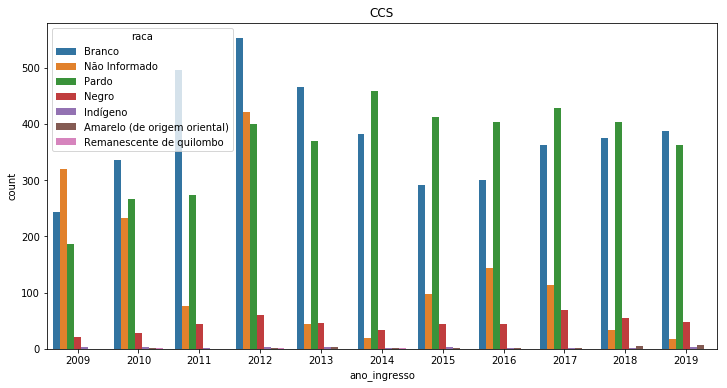

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ccs)
plt.title("CCS")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CCS no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informado, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

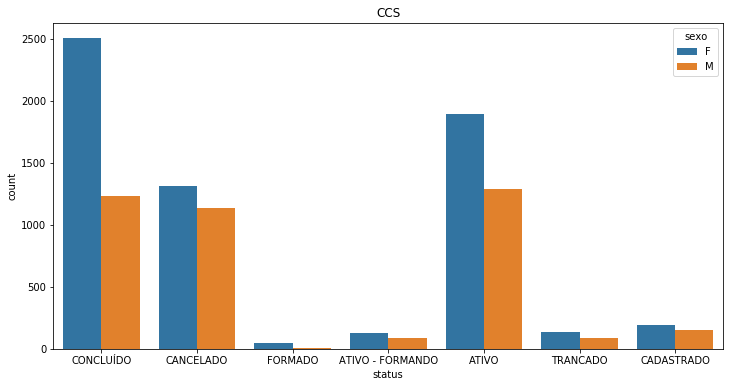

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ccs)
plt.title("CCS")
plt.show()

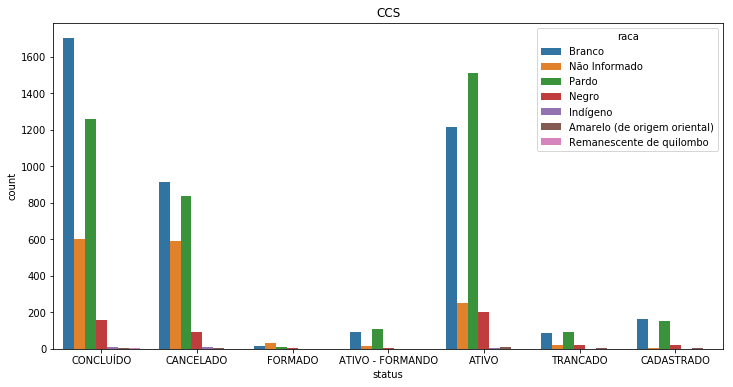

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ccs)
plt.title("CCS")
plt.show()

#### Centro de Tecnologia

>No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CT no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

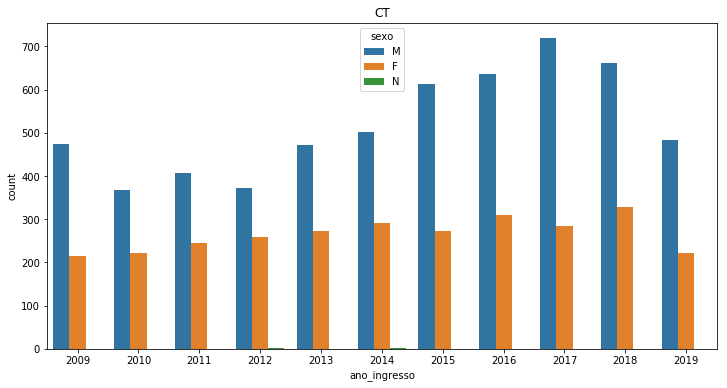

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ct)
plt.title("CT")
plt.show()

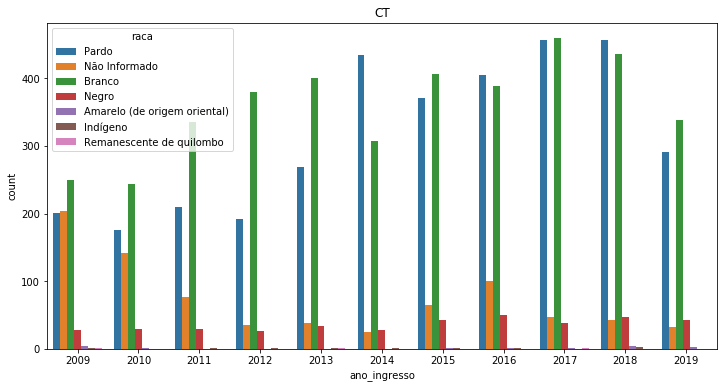

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ct)
plt.title("CT")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CT no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informado, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

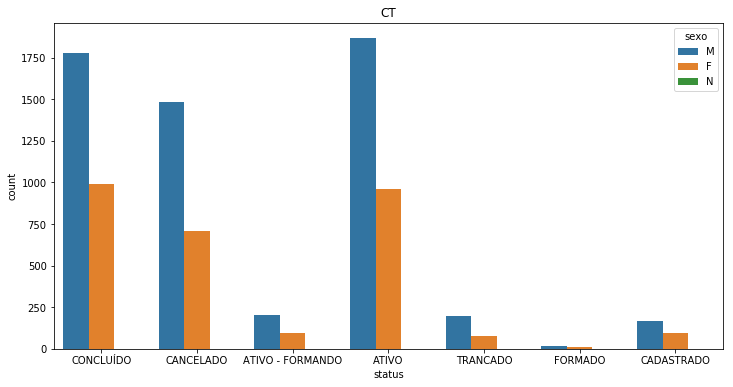

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ct)
plt.title("CT")
plt.show()

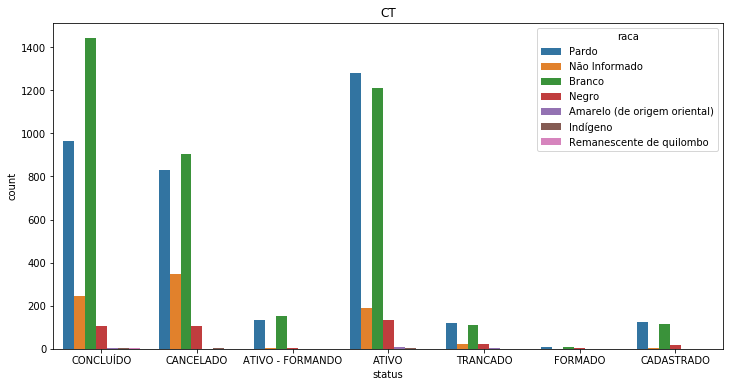

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ct)
plt.title("CT")
plt.show()

#### Centro de Biociências

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CB no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

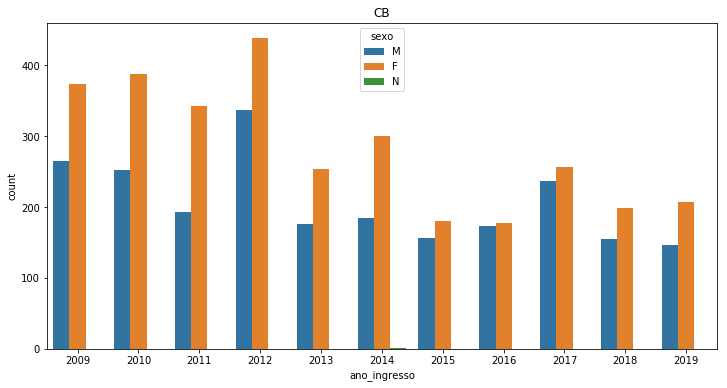

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = cb)
plt.title("CB")
plt.show()

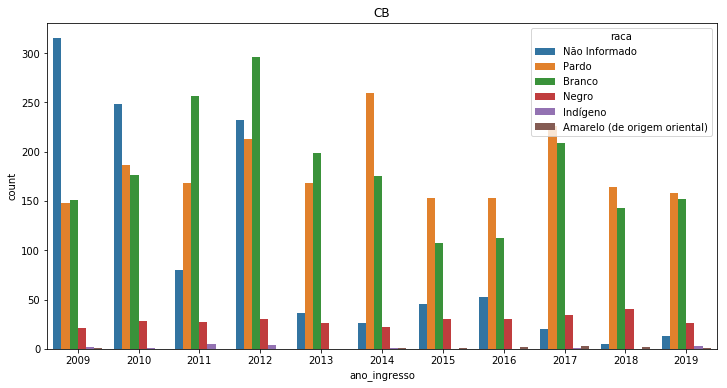

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = cb)
plt.title("CB")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos do CB no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino e Não Informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

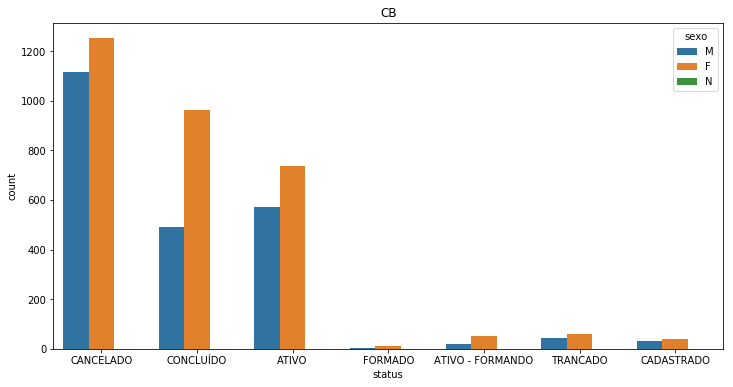

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = cb)
plt.title("CB")
plt.show()

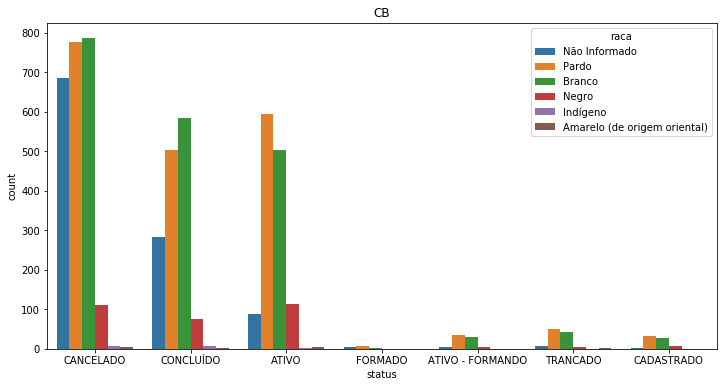

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = cb)
plt.title("CB")
plt.show()

#### Instituto Metrópole Digital

>No gráfico a seguir, analisaremos os dados de ingressantes no curso de Tecnologia da Informação  do IMD no campus de Natal, entre 2013 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

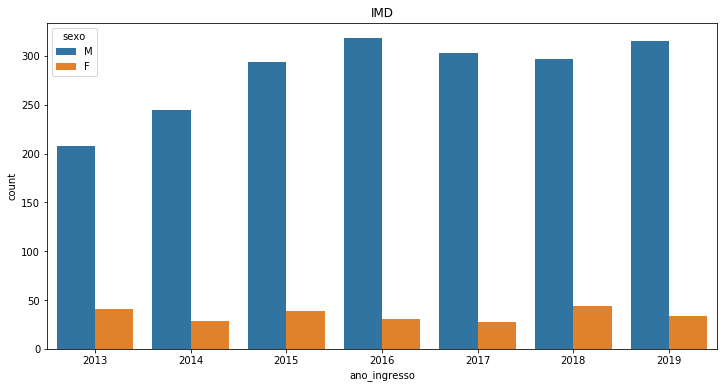

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = imd)
plt.title("IMD")
plt.show()

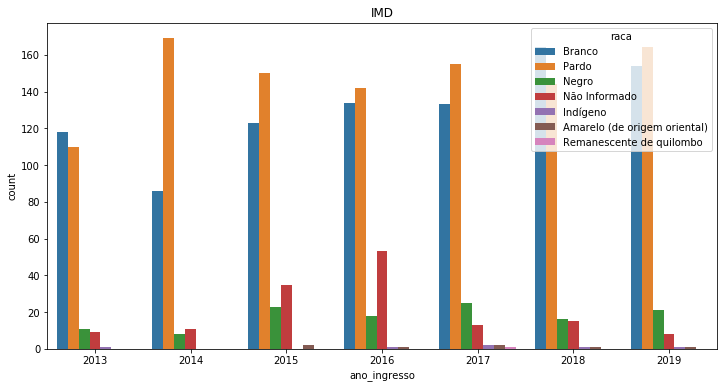

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = imd)
plt.title("IMD")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes no curso de Tecnologia da Informação do IMD no campus de Natal, entre 2013 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

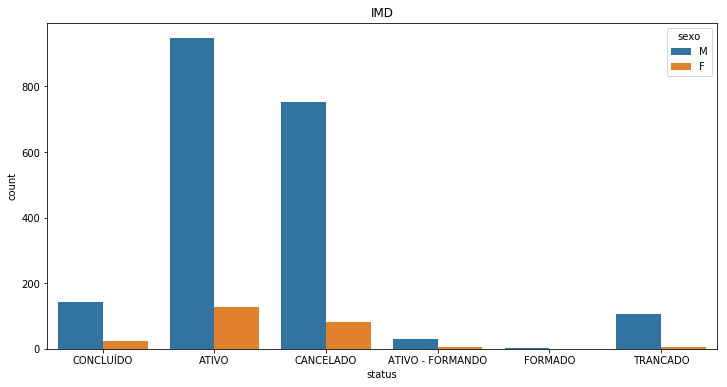

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = imd)
plt.title("IMD")
plt.show()

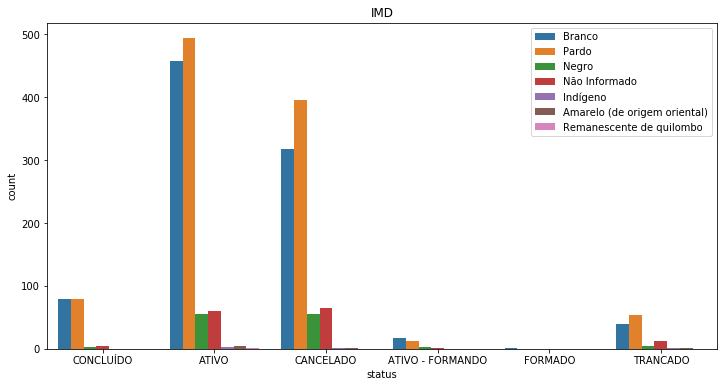

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = imd)
plt.title("IMD")
plt.legend(loc = 1)
plt.show()

#### Escola de Ciências e Tecnologia

> No gráfico a seguir, analisaremos os dados de ingressantes no curso de Ciências e Tecnologia da ECT no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino,  Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

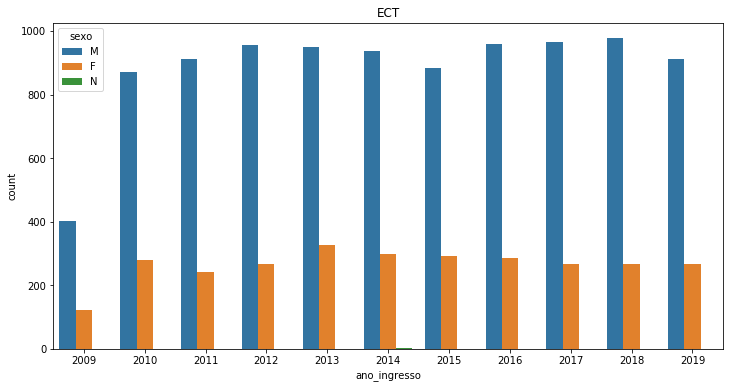

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ect)
plt.title("ECT")
plt.show()

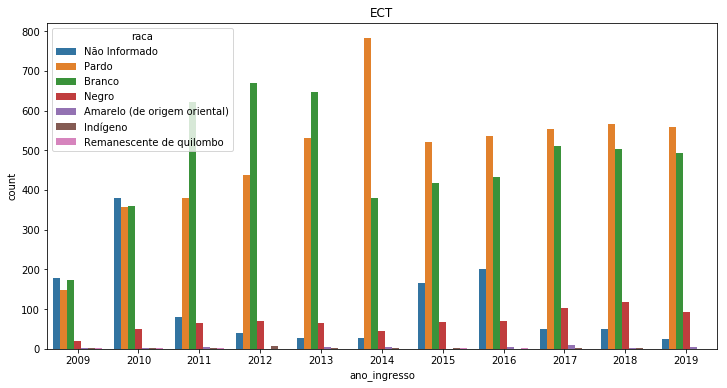

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ect)
plt.title("ECT")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes no curso de Ciências e Tecnologia da ECT no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

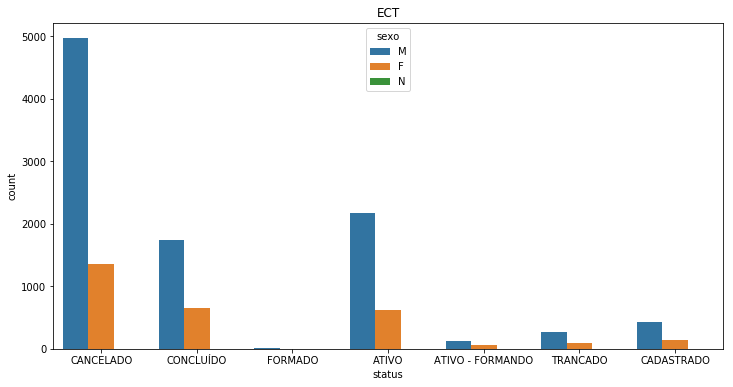

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ect)
plt.title("ECT")
plt.show()

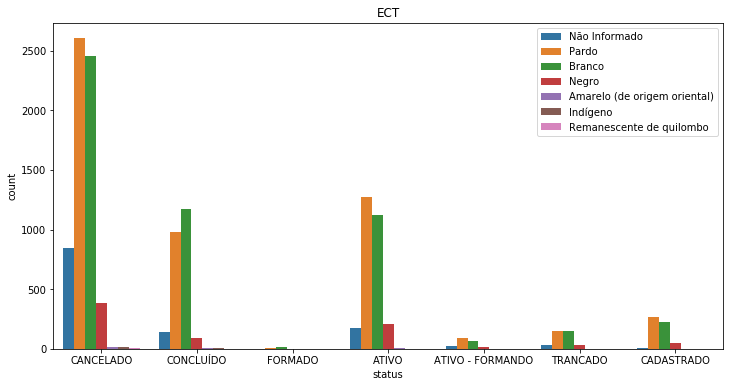

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ect)
plt.title("ECT")
plt.legend(loc = 1)
plt.show()

#### Escola da Saúde

>No gráfico a seguir, analisaremos os dados de ingressantes no curso de Gestão Hospitalar da ESUFRN no campus de Natal, entre 2011 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

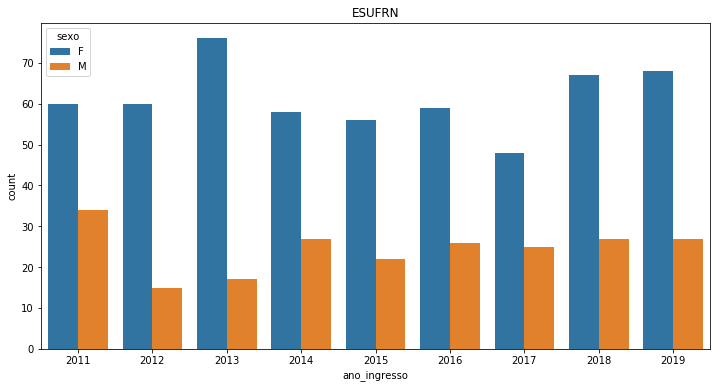

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = es)
plt.title("ESUFRN")
plt.show()

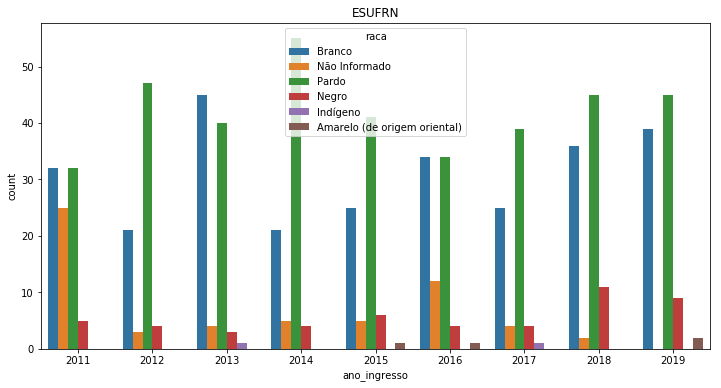

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = es)
plt.title("ESUFRN")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes no curso de Gestão Hospitalar da ESUFRN no campus de Natal, entre 2011 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

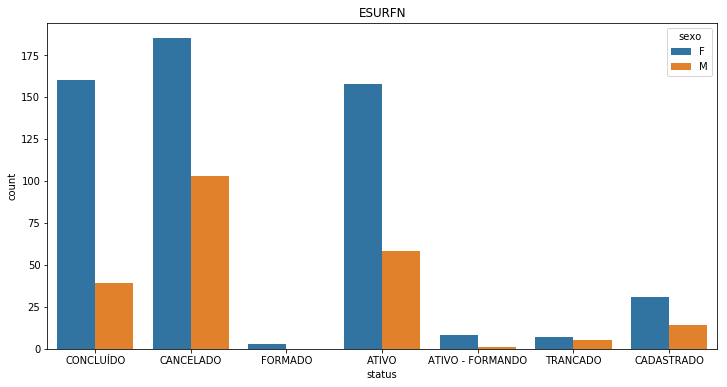

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = es)
plt.title("ESURFN")
plt.show()

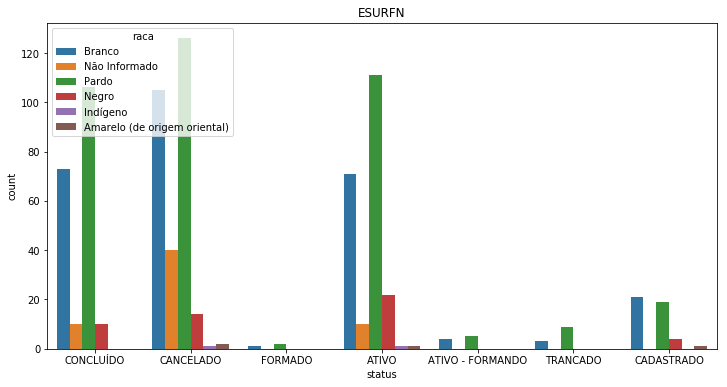

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = es)
plt.title("ESURFN")
plt.show()

#### Centro de Educação

> No gráfico a seguir, analisaremos os dados de ingressantes no curso de Pedagogia do CE no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

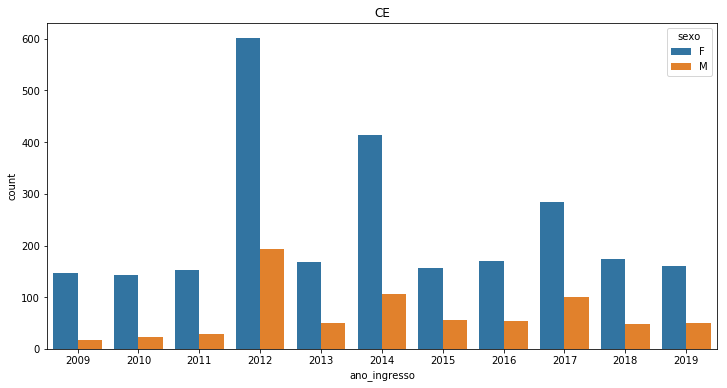

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ce)
plt.title("CE")
plt.show()

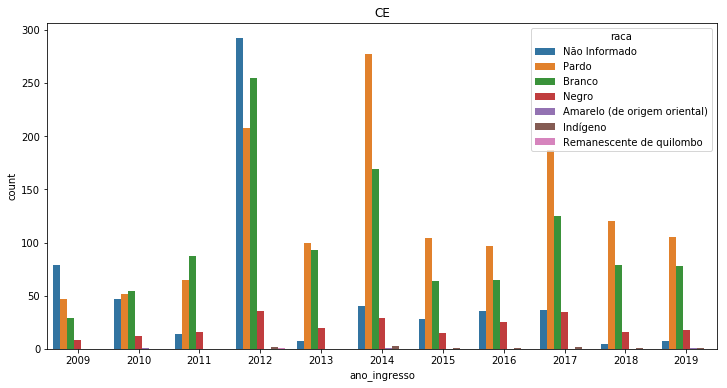

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ce)
plt.title("CE")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes no curso de Pedagogia do CE no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

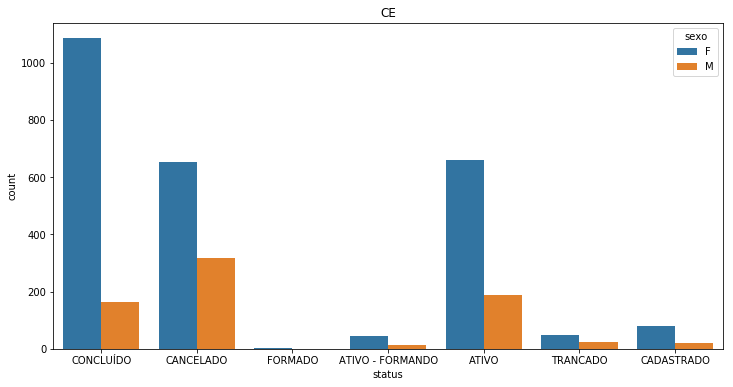

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ce)
plt.title("CE")
plt.show()

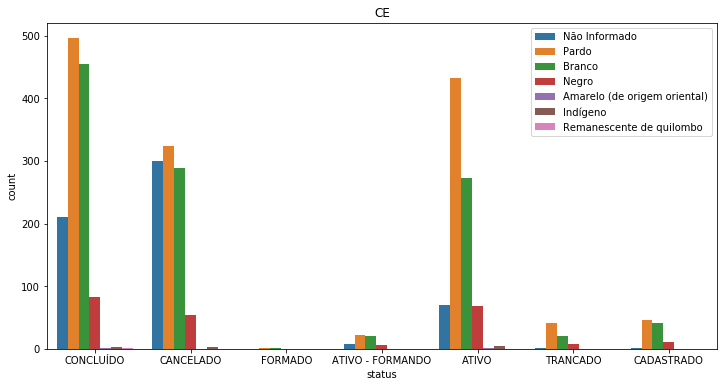

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ce)
plt.title("CE")
plt.legend(loc = 1)
plt.show()

#### Escola de Música

> No gráfico a seguir, analisaremos os dados de ingressantes no curso de 
Musica da EMUFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

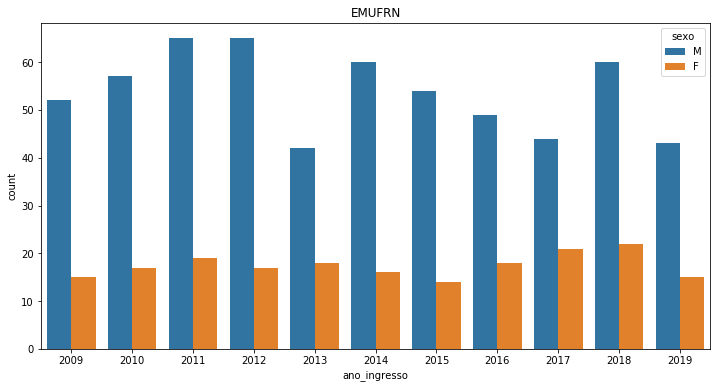

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = em)
plt.title("EMUFRN")
plt.show()

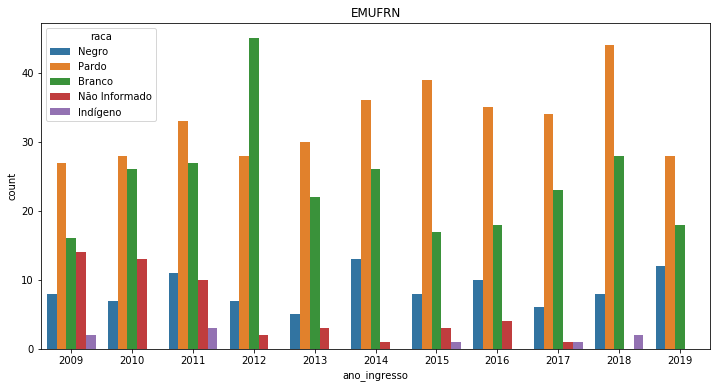

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = em)
plt.title("EMUFRN")
plt.show()

>No gráfico a seguir, analisaremos os dados de ingressantes no curso de Música da EMUFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso e status atuais desses alunos.

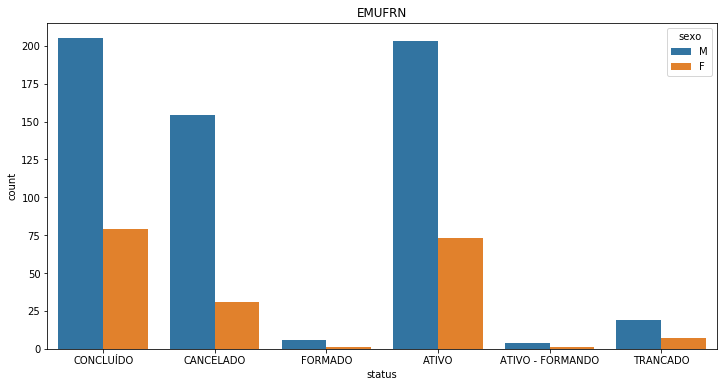

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = em)
plt.title("EMUFRN")
plt.show()

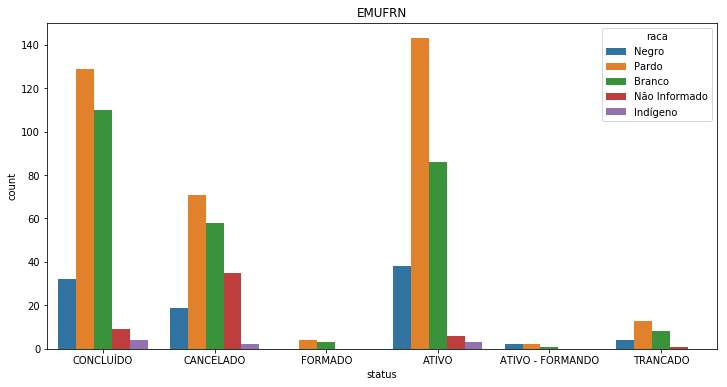

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = em)
plt.title("EMUFRN")
plt.show()

#### Análise sobre todos os cursos de graduação no campus de Natal

>No gráfico a seguir, analisaremos os dados de ingressantes em cursos de qualquer centro da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros:Maculino, Feminino e Não informados,  também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

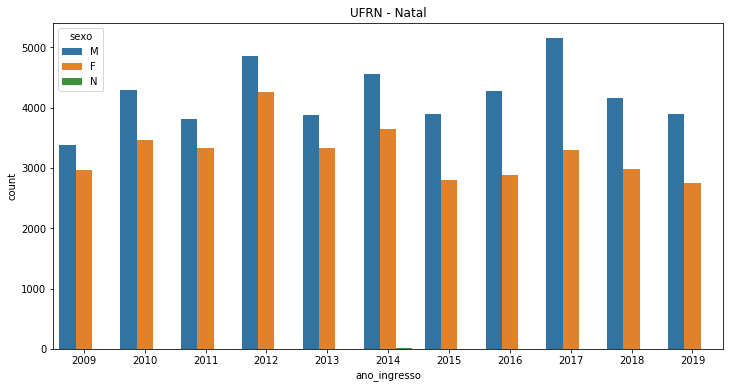

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ufrn_natal_grad)
plt.title("UFRN - Natal")
plt.show()

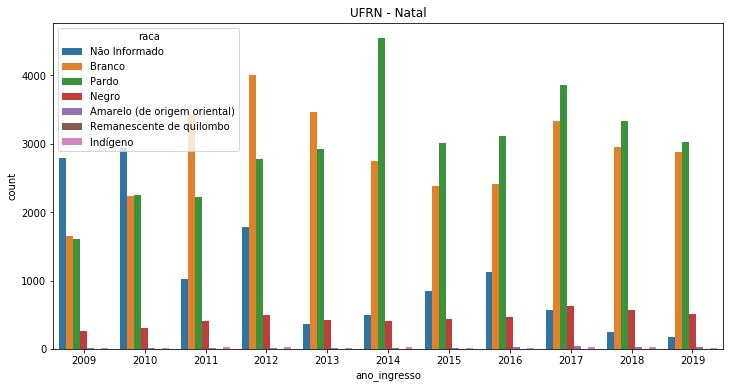

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ufrn_natal_grad)
plt.title("UFRN - Natal")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos de qualquer centro da UFRN no campus de Natal, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Maculino, Feminino e Não informados, também analisaremos os dados das etnias presentes no dataset.  No que se refere ao ingresso e status atuais desses alunos.

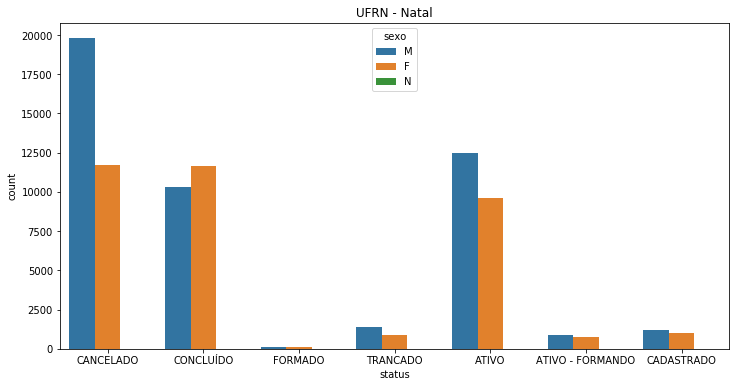

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ufrn_natal_grad)
plt.title("UFRN - Natal")
plt.show()

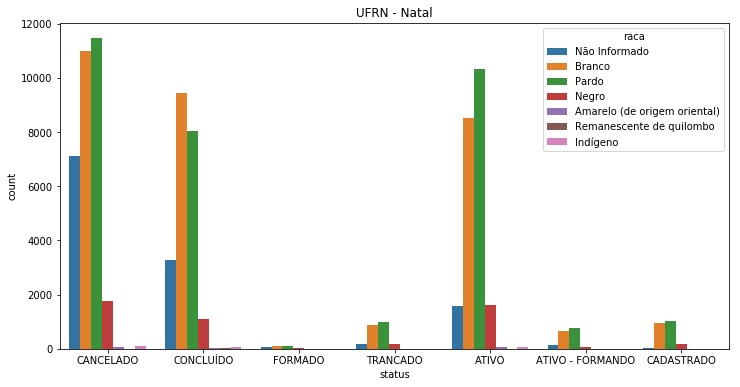

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ufrn_natal_grad)
plt.title("UFRN - Natal")
plt.show()

#### Conclusão sobre as diferenças (Gêneros e Étnias) nos de graduação da UFRN - Natal

**Diferenças entre gêneros** 
Ao analisar cada centro, percebe-se que existem alguns padrões sobre os quais vou discorrer abaixo.
> **Exatas / Tecnologicas**
> Existe uma unanimidade entre todos os centros dessa grandes áreas: Entra um número bem maior de Homens do que de mulher, e isso, obviamente se reflete nos números de concluintes.

> **Humanas / Sociais**
> Nos centros pertencem a essas áreas existem um equilíbrio bem maior de ingressantes dos diferentes gêneros. Ocorre uma alternância de gênero com mais ingressantes em centros dessas áreas, por exemplo, no CCSA geralmente ingressam mais Homens que mulheres, mas no CCHLA, geralmente ingressam mais mulheres que homens. Quanto ao reflexo desse equilibro nos concluintes, podemos notar algo interessante: Mesmo no CCSA em que entram mais homens, se formam masi mulheres. Abordarei melhor esse tema na nota ao fim desse tópico.

> **Saúde / Biológicas**
> Nos centros pertencentes a esses centro existe um padrão bem definido: Entram mais mulheres do que homens, e isso também é refletido diretamente nos concluintes dessas áreas.

> **Notas Interessantes**
> Existe um certo fenômeno que é bem perceptível nos centro mais equilibrados ou de maioria feminina: Os Homens cancelam seus cursos  mais que as mulheres. Podemos ver exemplos claros disso no CCHLA e no CCSA. No primeiro entram mais mulheres, porém existem um número maior de cancelamento por parte Masculina. Já no segundo, entram mais homens, porém se formam mais mulheres.

**Diferenças entre etnias**
> É notório um padrão distribuído entre todos os centros da UFRN - Natal, A maioria dos alunos é formada por brancos e pardos, com uma certa alternância entre quem tem mais representatividade de centro pra centro. Em todos os centros ocorre uma predominância dessas duas etnias enquanto Negros, Indígenas, Amarelos, etc. Tem uma representatividade muito baixa em todos os centros.

#### Comparativo entre os Cursos de graduação de Natal e os dados gerais de ingressantes

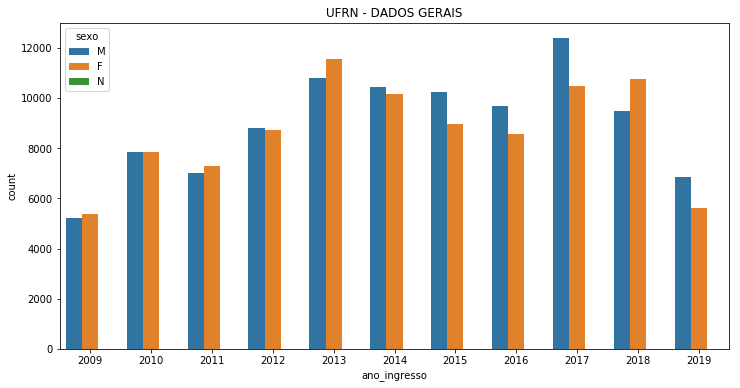

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.show()

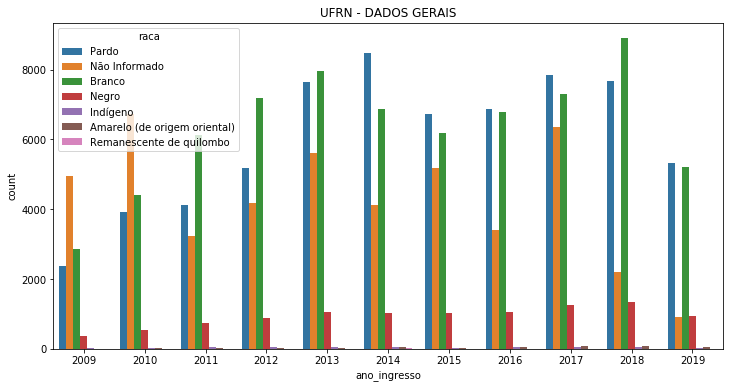

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.show()

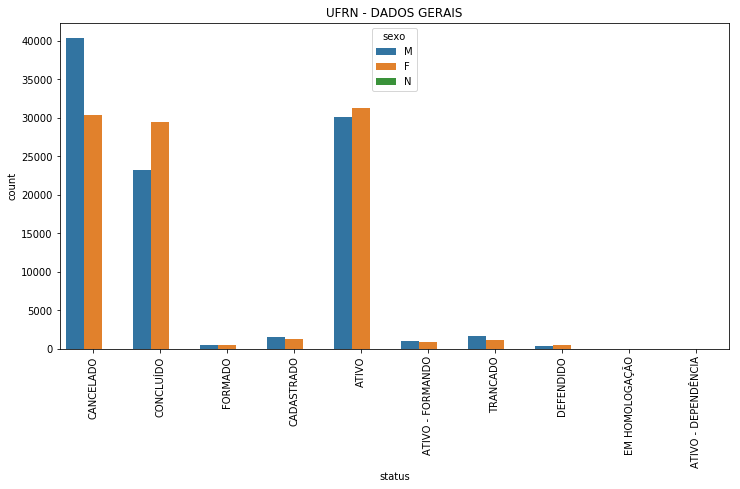

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.xticks(rotation = 90)
plt.show()

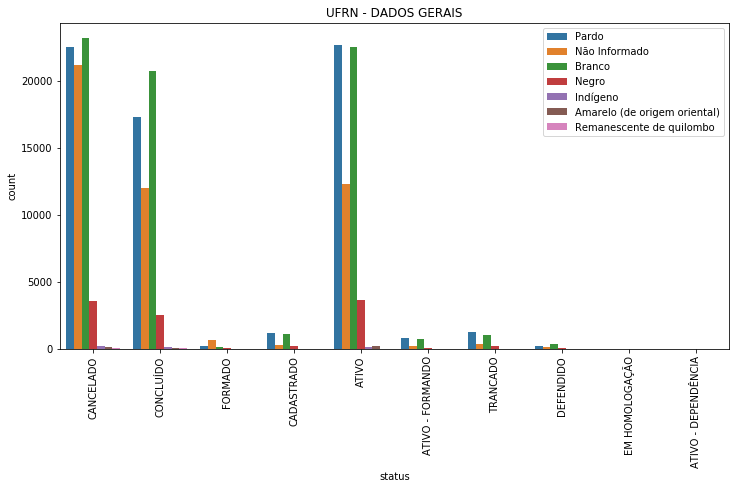

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.legend(loc = 1)
plt.xticks(rotation = 90)
plt.show()

> **Conclusão (Gêneros)**
Comparando os dados dos cursos de graduação de Natal e os dados gerais, vemos que existe um equilíbrio bem maior nos dados gerais, e seguindo o mesmo padrão detectado na análise anterior, se formam mais mulheres devido aos homens cancelarem mais seus cursos.

> **Conclusão (Etnias)**
Quanto as diferenças étnicas, vemos que os dados gerais não diferem muito dos dados das graduações de Natal. Tendo muito mais brancos e pardos e poucos negros, indigenas, amarelos e remanecentes de quilombo.

### UFRN - Multicampi/interior

#### Escola Multicampi de Ciências Médicas do Rio Grande do Norte

>No gráfico a seguir, analisaremos os dados de ingressantes no curso de Medicida da EMCM, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.


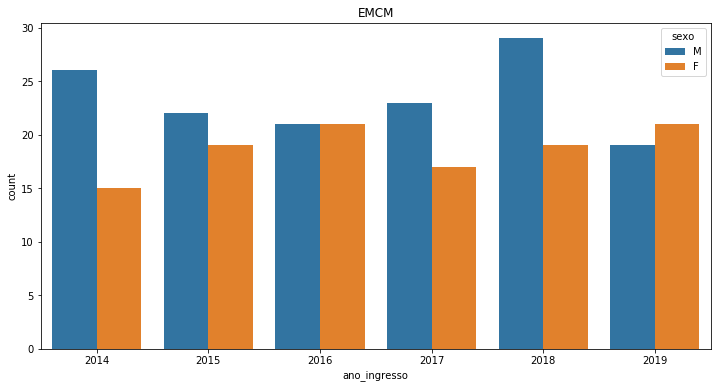

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = emcm)
plt.title("EMCM")
plt.show()

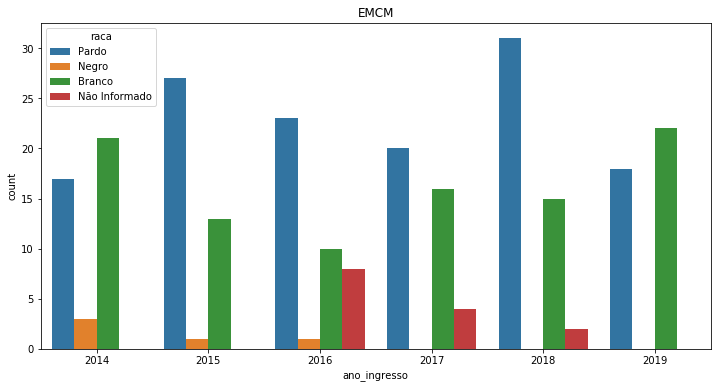

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = emcm)
plt.title("EMCM")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes no curso de Medicida da EMCM, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos e seus status atuais.

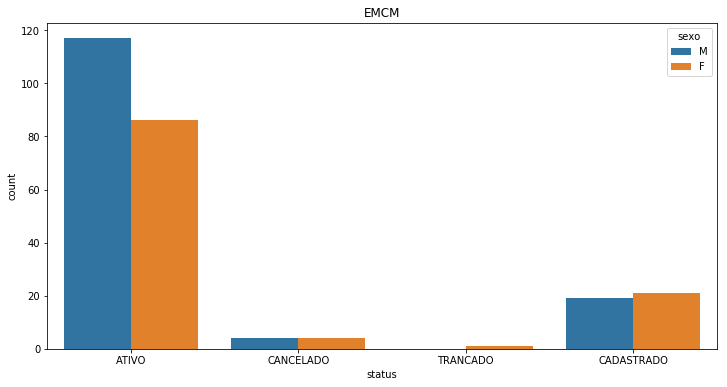

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = emcm)
plt.title("EMCM")
plt.show()

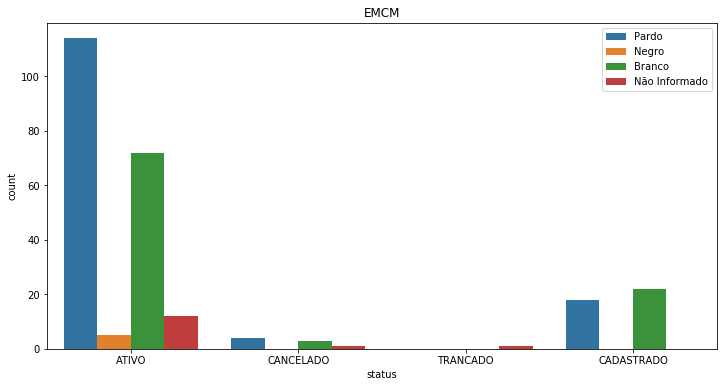

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = emcm)
plt.title("EMCM")
plt.legend(loc = 1)
plt.show()

>**Conclusão (Gêneros)** Analisando os dados da EMCM, vemos que existe um número levemente maior de alunos do gênero Masculino, e isso se reflete diretamente no número de alunos ativos atuais (Não deu tempo para contabilizar nenhuma formatura até 2019).

> **Conclusão (Etnias)**  Seguindo o mesmo padrão da UFRN - Natal, existe um número bem maior de alunos brancos e pardos, porém com um número considerávemente maior de pardos, e um baixo número de negros, indegenas, amarelos e remanescentes de quilombos. Obviamente isso reflete no número de alunos ativos atuais.

#### Escola Agrícola de Jundiaí

> No gráfico a seguir, analisaremos os dados de ingressantes nos cursos da EAJ entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

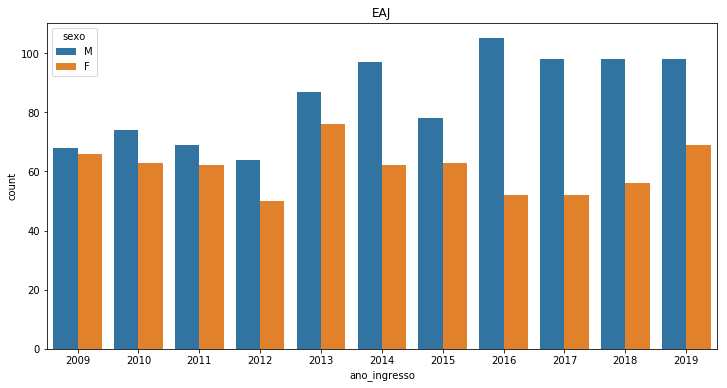

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = eaj)
plt.title("EAJ")
plt.show()

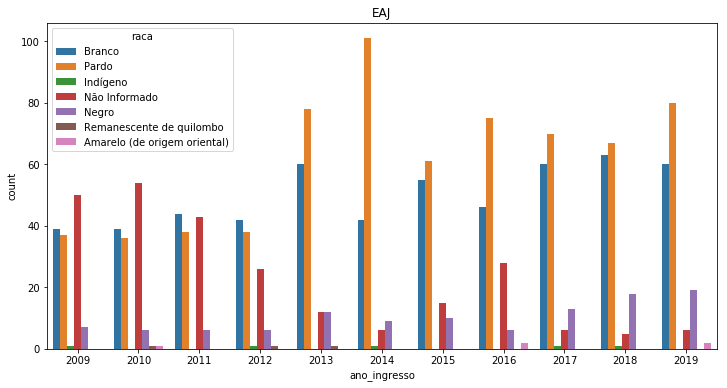

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = eaj)
plt.title("EAJ")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes nos cursos da EAJ entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos e seus status atuais.

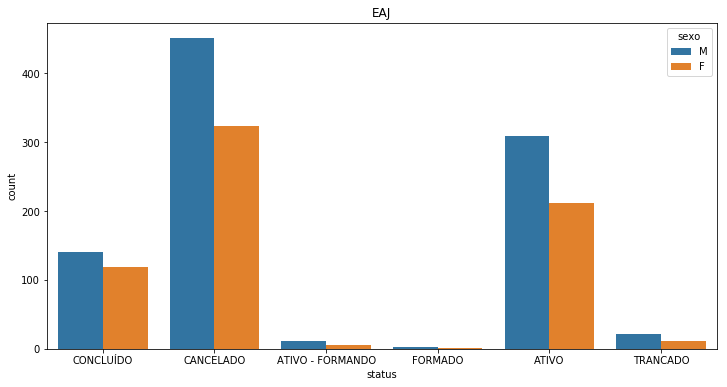

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = eaj)
plt.title("EAJ")
plt.show()

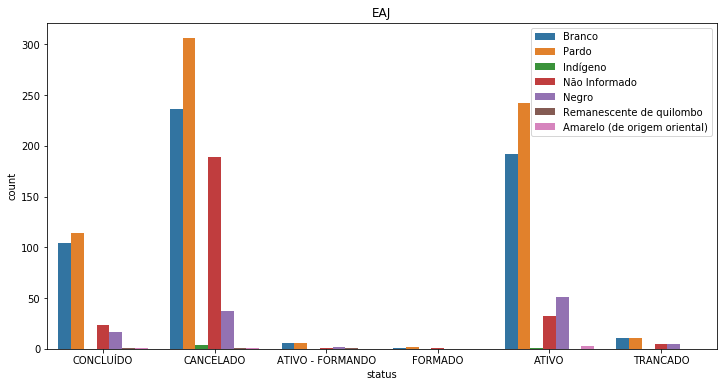

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = eaj)
plt.title("EAJ")
plt.legend(loc=1)
plt.show()

>**Conclusão (Gêneros)** Analisando os dados da EAJ, vemos que existe um número maior de homens do que mulheres, e isso se reflete diretamente no número de concluintes.

> **Conclusão (Etnias)** Seguindo o mesmo padrão da UFRN - Natal, existe um número bem maior de alunos brancos e pardos e um baixo número de negros, indegenas, amarelos e remanescentes de quilombos. Obviamente isso se reflete no número de concluintes.

#### Faculdade de Ciências da Saúde do Trairí

> No gráfico a seguir, analisaremos os dados de ingressantes nos cursos da FACISA entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

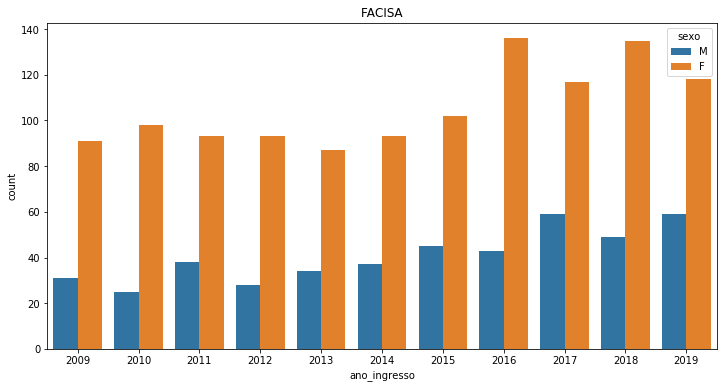

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = facisa)
plt.title("FACISA")
plt.show()

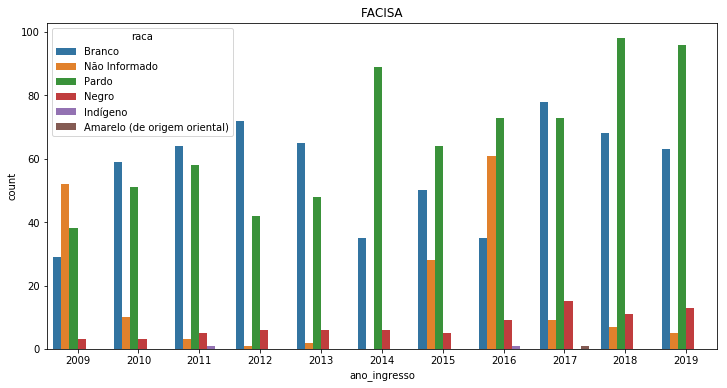

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = facisa)
plt.title("FACISA")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes nos cursos da FACISA entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos e seus status atuais.

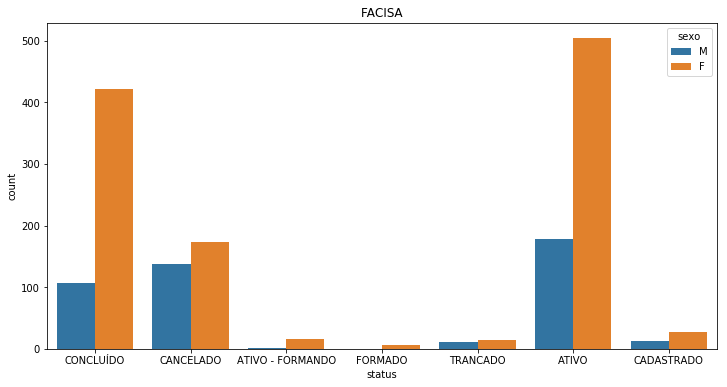

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = facisa)
plt.title("FACISA")
plt.show()

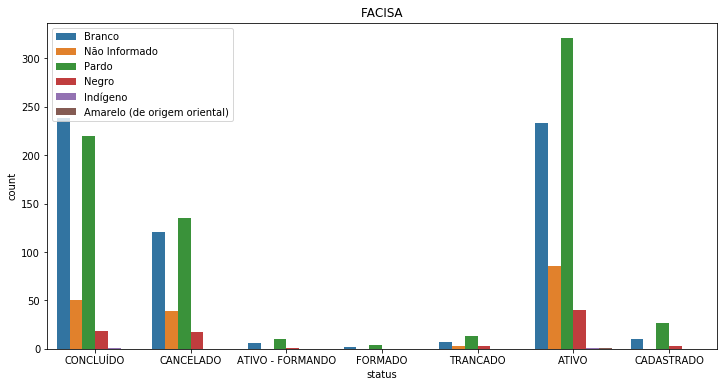

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = facisa)
plt.title("FACISA")
plt.legend(loc = 2)
plt.show()

>**Conclusão (Gêneros)**
Analisando os dados da Facisa é claro um número bem maior de mulheres do que de homens, e isso se reflete diretamente no número de concluintes.


> **Conclusão (Etnias)** Seguindo o mesmo padrão da UFRN - Natal, existe um número bem maior de alunos brancos e pardos e um baixo número de negros, indegenas, amarelos e remanescentes de quilombos. Obviamente isso se reflete no número de concluintes.

>**Notas interessantes**
O número de cancelamentos é bem mais equilibrado do que o número de ingressantes de gêneros diferentes, devido ao mesmo padrão da UFRN - Natal de os homens cancelarem mais seus cursos.

#### Centro de Ensino Superior do Seridó

> No gráfico a seguir, analisaremos os dados de ingressantes nos cursos da CERES entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino, Feminino e Não Informado, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

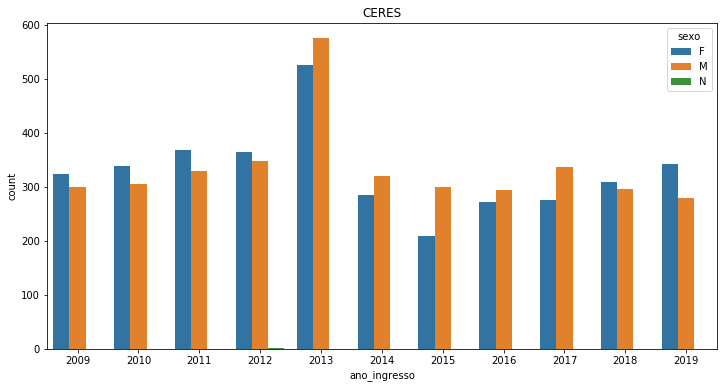

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = cess)
plt.title("CERES")
plt.show()

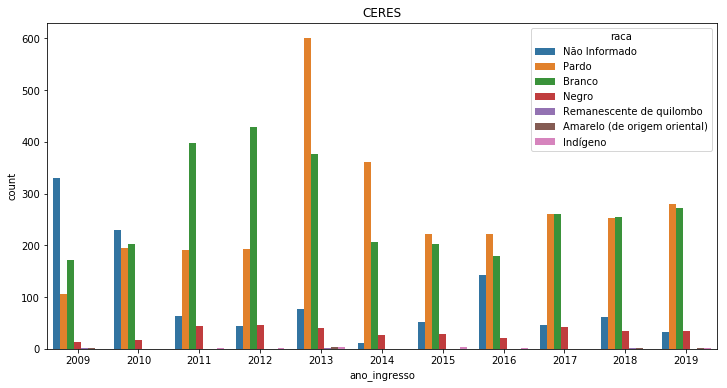

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = cess)
plt.title("CERES")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes nos cursos do CERES entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Masculino e Feminino e Não Informado, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos e seus status atuais.

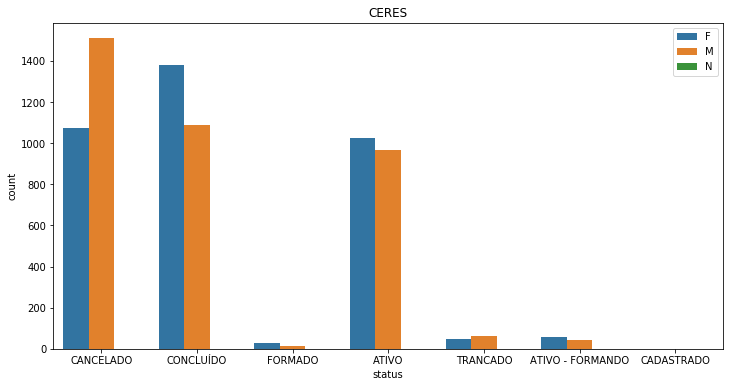

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = cess)
plt.title("CERES")
plt.legend(loc = 1)
plt.show()

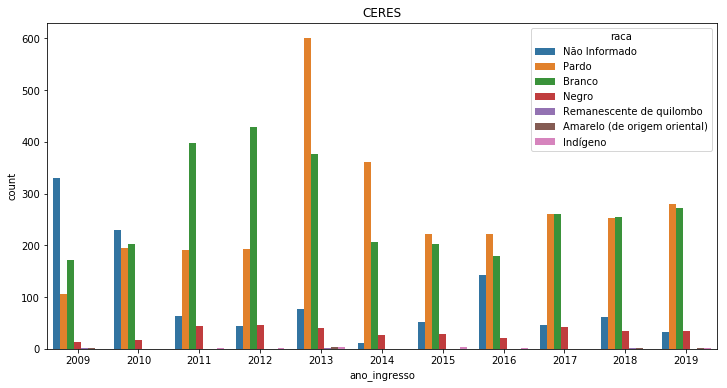

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = cess)
plt.title("CERES")
plt.show()

>**Conclusão (Gêneros)** Analisando os dados do CERES, vemos que existe um equilíbrio entre os gêneros, e seguindo o mesmo padrão da UFRN - Natal, os homens cancelam mais seus cursos, logo, se formam mais mulheres

>**Conclusão (Etnias)**
Seguindo o mesmo padrão da UFRN - Natal, existe um número bem maior de alunos brancos e pardos e um baixo número de negros, indegenas, amarelos e remanescentes de quilombos. Obviamente isso se reflete no número de concluintes.

#### Análise sobre todos os cursos de graduação fora de Natal ou Multicampi

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos de qualquer centro da UFRN nos campus fora de Natal ou Multicampi, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Homens, Mulheres e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos durante os anos.

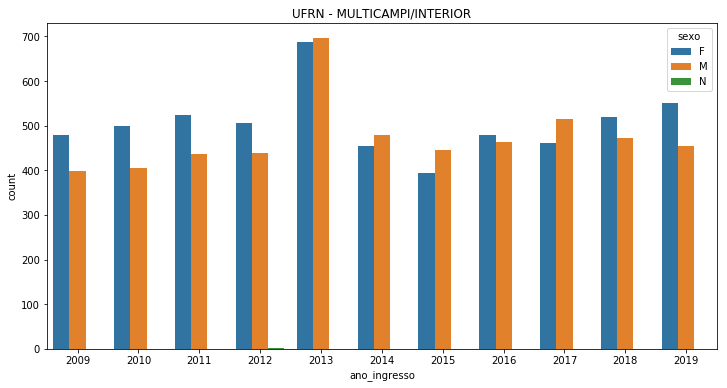

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = ufrn_interior)
plt.title("UFRN - MULTICAMPI/INTERIOR")
plt.show()

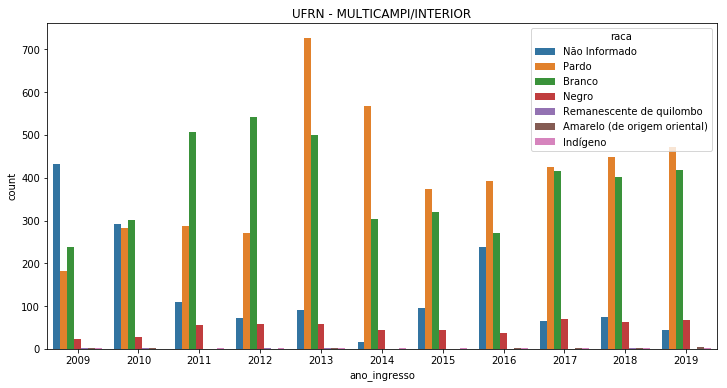

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = ufrn_interior)
plt.title("UFRN - MULTICAMPI/INTERIOR")
plt.show()

> No gráfico a seguir, analisaremos os dados de ingressantes em cursos de qualquer centro da UFRN nos campus fora de Natal ou Multicampi, entre 2009 e 2019. Iremos comparar mais precisamente os dados dos gêneros: Homens, Mulheres e Não informados, também analisaremos os dados das etnias presentes no dataset. No que se refere ao ingresso desses alunos e seus status atuais.

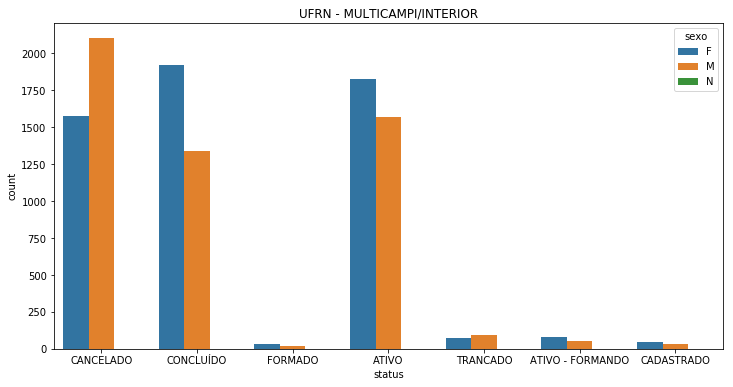

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = ufrn_interior)
plt.title("UFRN - MULTICAMPI/INTERIOR")
plt.show()

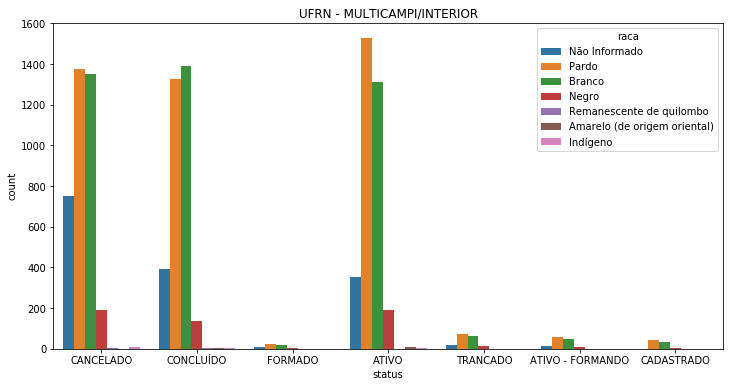

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = ufrn_interior)
plt.title("UFRN - MULTICAMPI/INTERIOR")
plt.show()

>**Conclusão (Gêneros)** Analisando os 4 centros como um todo, vemos que existe um equilíbrio entre os gêneros,  e seguindo o mesmo padrão da UFRN - Natal, os homens cancelam mais seus cursos, logo, se formam mais mulheres.

>**Conclusão (Etnias)**
Seguindo o mesmo padrão da UFRN - Natal, existe um número bem maior de alunos brancos e pardos e um baixo número de negros, indegenas, amarelos e remanescentes de quilombos.

#### Comparativo entre os Cursos de graduação fora de Natal ou Multicampi e os dados gerais de ingressantes

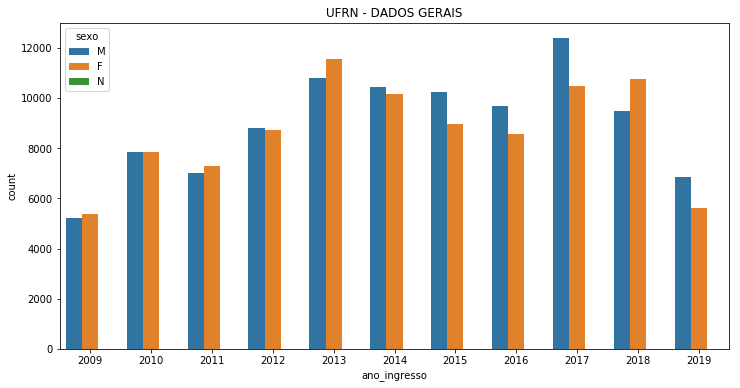

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'sexo', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.show()

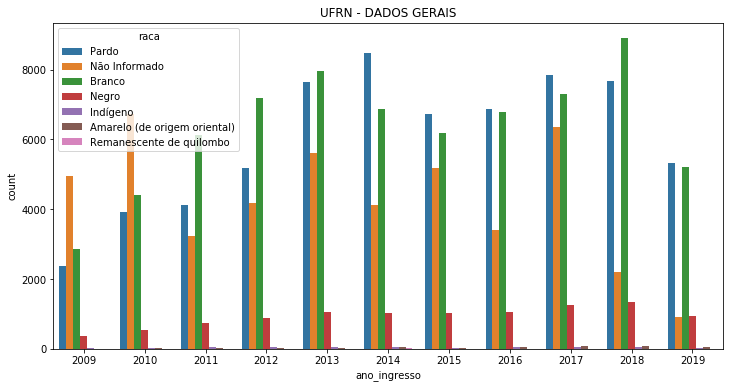

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'ano_ingresso', hue = 'raca', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.show()

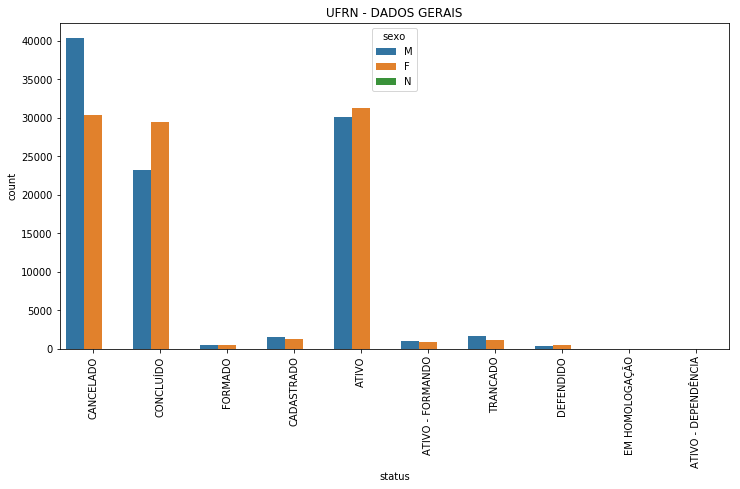

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'sexo', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.xticks(rotation = 90)
plt.show()

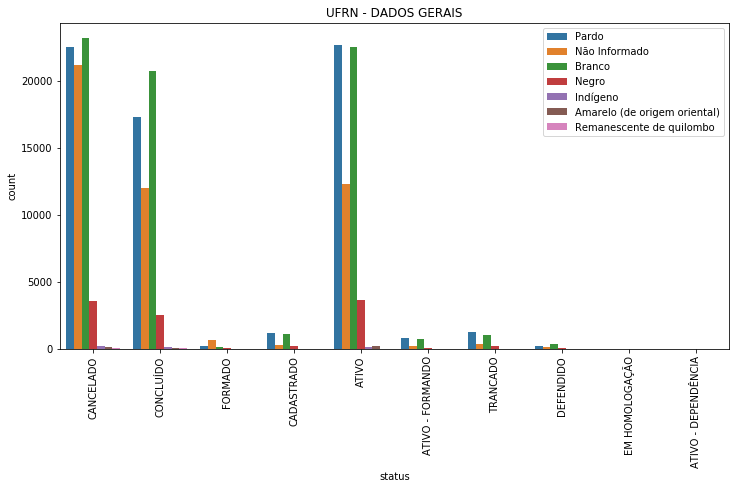

In [0]:
fig, ax = plt.subplots(figsize = (12, 6)) 

ax = sns.countplot(x = 'status', hue = 'raca', data = discentes)
plt.title("UFRN - DADOS GERAIS")
plt.legend(loc = 1)
plt.xticks(rotation = 90)
plt.show()

> **Conclusão (Gêneros)**
Comparando os dados dos cursos de graduação fora de Natal ou Multicampi e os dados gerais, vemos que existe um equilíbrio em ambos os dados na questão dos gêneros, e seguindo o mesmo padrão detectado na análise anterior, se formam mais mulheres devido aos homens cancelarem mais seus cursos.

> **Conclusão (Etnias)**
Quanto as diferenças étnicas, vemos que os dados gerais não diferem muito dos dados das graduações de Natal. Tendo muito mais brancos e pardos e poucos negros, indigenas, amarelos e remanecentes de quilombo.